# BANK FRAUD DETECTION ( CAPSTONE PROJECT )

## PROBLEM STATEMENT :

Banking industry has been undergoing major digital switch overs to provide enhanced services to the consumers, application for opening a new account is one of them. However, due to a fast-paced advancement in technologies that come with their loopholes, fraudsters have been using sophisticated techniques to commit fraud making it difficult for traditional rule-based systems to detect and prevent fraudulent activities. Banking establishments are highly affected as this type of activities directly harm the bank – consumer relationship and come with negative consequences for both the bank as well as the individuals involved. The banks may have to face situations such as loss of potential new consumers, loss of trust, reputation damages, and any substantial monetary loss for reparations of these situations. The consumers on the other hand may suffer from identity theft, monetary losses in some cases, service dissatisfaction, and sentiment affliction in some cases.

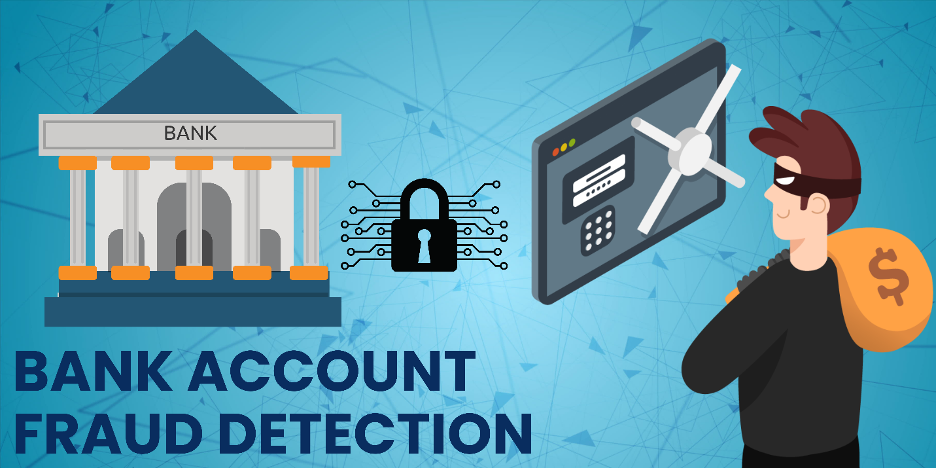

## DATA DICTIONARY :

<b>1. Fraud_bool	:</b> Represented in binary values of 0 and 1.  0 displaying a negative outcome showcasing there is no fraudulent activities in the application. 1 showcases a affirmation of fraudulent activities being present.
	
<b>2. Income :</b>	 The annual income of applicants is shown in a range of 0.1 to. 0.9. 0.1 being the lowest and 0.9 being the highest class of income.
	
<b>3. Name_email_similarity	:</b> Displays the similarity between the name of the applicants and their email address. The values are displayed in numeric format ranging between 0 to 1. Higher values indicating higher similarity.
	
<b>4. Prev_address_months_count	:</b> The values in this column represent the count of months of previous residency of the applicant from the day of application. The range goes from -1 to 383.
	
<b>5. Current_address_month_count	 :</b> Shows the count of months for current address residency of the applicant. The range goes from -1 to 428.
	
<b>6. Customer_age	:</b> Ages of the customers in decades form ranging from 10 to 90.
	
<b>7. Days_since_request	:</b> number of days since the application request. Ranges from 4 to 79.
	
<b>8. Intended_balcon_amount	:</b> Initial amount transferred for application of accounts. The range is between -15 to 113.
	
<b>9. Payment_type	:</b>  The type of credit payment plan utilized by the applicant. There are 5 anonymized types of values.
	
<b>10. Zip_count_4w	:</b> The count of applications made in the same zip code. Ranges from 1 to 6700.
	
<b>11. Velocity_6h	:</b> average number of applications made per hour in last 6 hours. Ranges between -17 to 16716.
	
<b>12. Velocity_24h	:</b> average number of applications made per hour in 24 hrs. ranges between 1300 to 9507.
	
<b>13. Velocity_4w	:</b> average number of applications made per hour in the last 4 weeks. The range lies between 2825 to 6995.
	
<b>14. Bank_branch_count_8w	:</b> count of applications in selected branch of the bank in 8 weeks. Ranges between 0 to 2385.
	
<b>15. Date_of_birth_distinct_emails_4w	:</b> count of applicants with the same date of birth who have applied in the last 4 weeks. The range goes from 0 to 39.
	
<b>16. Employment_status	:</b> Employment status of the applicants represented in 7 different pseudonymous values. 
	
<b>17. Credit_risk_score	:</b>  The internal score of credit risk during application that is set up with respect to the standards and regulations of the bank. Ranges between -170 to 389.
	
<b>18. Email_is_free :</b>	 showcased in Boolean values of 0 and 1. 0 being free domain of application email and 1 being paid domain of application email.
	
<b>19. Housing_status :</b>	 The housing status of applicants, for privacy reasons have been anonymized. There are 7 categories.
	
<b>20. Phone_home_valid	:</b> validity of the phone number being provided by the applicant in binary values 0 and 1. 0 representing invalid and 1 representing valid.
	
<b>21. Phone_mobile_valid	:</b> validity of the mobile number provided by the applicant in binary values 0 and 1. 0 being invalid and 1 being valid.
	
<b>22. Bank_months_count	:</b> The count of months of the previous account held by the applicant if any.
	
<b>23. Has_other_cards	:</b>  Holding card(s) from the same company, represented in binary values 0 and 1. 0 showcasing applicant not holding any other card, 1 being positive affirmation of a card being held by the user.

<b>24. Proposed_credit_limit	:</b> applicant’s proposed credit limit. Ranges between 190 to 2100.
	
<b>25. Foreign_request	:</b> represents whether the application request is made from a different country, showcased in binary values 0 and 1. 
	
<b>26. Source	:</b> the online source of application. Has two categories internet and teleapp.
	
<b>27. Session_length_in_minutes	:</b> length of the user’s session / usage on the website of the bank. Ranges from -1 to 86 minutes.
	
<b>28. Device_os	:</b> The user’s operation system utilised during the application request session. 5 categories being windows, macintosh, x11, linux, others.
	
<b>29. Keep_alive_session	:</b> The log out option being used by the user represented in binary values 0 and 1.
	
<b>30. Device_distinct_emails_8w	:</b>  number of distinct emails used by the user from the same device. Ranges between -1 to 2.
	
<b>31. Device_fraud_count :</b>	 Count of fraudulent activities from used device.
	
<b>32. Month	:</b> The month of application. 

## A. DATA UNDERSTANDING :

In this step we will try to ;

- Understanding the essence of the data.
- finding the range, categories and unique values present.
- Finding out the variables and their significance.
- Checking for outliers, missing values and distribution of the variables.

In [27]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from scipy.stats import stats
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV, LassoCV, MultiTaskLasso, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score,mean_squared_error, cohen_kappa_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
#from pandas_profiling import ProfileReport
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
#note : The models with business interpretation written have been selected as the best models.

In [47]:
# setting the figure size for the visualisation plots 

rcParams['figure.figsize'] = 25,18

In [48]:
# To display all the rows and columns of the data

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# Importing and reading the file in the jupyter notebook

bank_fraud = pd.read_csv('Variant_Base.csv')
bank_fraud.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


#### a.1 finding the dimensions of the data

In [6]:
bank_fraud.shape

(1000000, 32)

#### a.2 understanding the dataset, it's dimensions, datatype, variable names.

In [7]:
bank_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

#### a.3 for each column unique values, min max value, no. of categories

In [8]:
bank_fraud['fraud_bool'].unique()

array([1, 0])

In [9]:
bank_fraud['income'].unique()

array([0.9, 0.3, 0.7, 0.6, 0.4, 0.2, 0.8, 0.1, 0.5])

In [10]:
print(bank_fraud['income'].min())
print(bank_fraud['income'].max())

0.1
0.9


In [11]:
bank_fraud['name_email_similarity'].nunique()

998861

In [12]:
# number of months since the previous address has been registered
bank_fraud['prev_address_months_count'].unique()

array([ -1,  92, 172,  28, 289,  35,  55, 194, 103,  27,  34,  58,  61,
        12,  57,  53,  96,  30, 111,  26,  86,  64,  18, 234,  97,  56,
        54, 125, 110,  65, 217,  93, 126,  25,  33,  80,  99,  45, 104,
        87,  49,  62, 282, 101, 135, 154,  36,  14,  91,  83,  10,  32,
        51, 325, 333, 159,  11, 318, 109, 152, 288, 102, 336, 202, 225,
       118, 115, 319, 201,  47,  37, 241,  60,  13, 165,  66,  94,  95,
        98,  59,  29,  89,  16, 304, 211, 314,  22,  31,  63, 321, 141,
       112,  52, 151, 142,   9,  50, 173,  90, 307, 106,  78,  24, 195,
       310,   8, 146, 284,  85,  44, 160,  23, 100,  38,  48, 327, 140,
       105, 122,  67, 127,  21, 119,   7, 156, 179,  88, 107,  82,  42,
       145, 324,  39, 306, 339, 209, 294,  72,  79, 246, 114,  84, 137,
        46, 188, 220, 139,  74, 312, 239,  75,  20, 161, 168, 290,  68,
       187, 303, 116, 230, 297,  77, 203, 181, 177,  41, 291, 123, 124,
       108, 295, 308, 133, 183, 278,  43, 121, 130, 328, 113, 18

In [13]:
print(bank_fraud['prev_address_months_count'].min())
print(bank_fraud['prev_address_months_count'].max())

-1
383


In [14]:
bank_fraud['current_address_months_count'].unique()

array([ 88, 144, 132,  22, 218,  30, 152,  18,  64,  60, 131, 109, 107,
       123,  37,  55, 173,  50,  94, 153,  82,   9,  19, 184,  56,   5,
        90,  78,   3, 162,  34, 112,  23,  99,  44,  51, 140,  62,  98,
       135, 209,  72, 229, 185,  14,  71, 239, 183,  16, 141, 186,  26,
        63, 142,  80, 199, 119,   8,   2, 118, 272, 306, 216, 212,  48,
       151, 189, 117, 124, 203, 130,  29, 176, 120,  57, 104, 247, 143,
       128, 149,   0, 122, 129, 360, 106, 170, 101,  15,  74, 220, 363,
       236, 159,  69,  93,  27,  12, 356, 146,   6,  36,  32,  83, 273,
       155,  45, 349,  41,  17, 361, 188,  79,  -1, 171, 111, 138,  68,
       169, 175,  47,  39, 160, 113,  13,   7, 270,  25, 274, 296, 377,
        38,  35,  54,  89, 105,  11, 156, 167,  33, 194, 290, 145,  31,
       381, 215,  43, 136,  61, 178,  42,  85,  84,  58,  49, 102,  76,
       103, 177,   1,  73, 126,  70, 139, 181, 250, 366, 125, 121, 137,
       147,  66, 154, 328,  52, 232, 295, 100,  87, 257,  65, 32

In [15]:
print(bank_fraud['current_address_months_count'].min())
print(bank_fraud['current_address_months_count'].max())

-1
428


In [16]:
bank_fraud['customer_age'].unique()

array([50, 40, 30, 20, 70, 60, 80, 10, 90])

In [17]:
bank_fraud['days_since_request'].unique()

array([0.02092517, 0.00541754, 3.10854879, ..., 0.01856287, 0.01535159,
       2.65591566])

In [18]:
print(bank_fraud['days_since_request'].min())
print(bank_fraud['days_since_request'].max())

4.036859788721786e-09
78.45690383509861


In [19]:
bank_fraud['intended_balcon_amount'].unique()

array([-1.33134496, -0.81622375, -0.7557277 , ..., 34.69276003,
       94.66105465,  9.90849898])

In [20]:
print(bank_fraud['intended_balcon_amount'].min())
print(bank_fraud['intended_balcon_amount'].max())

-15.530554840076814
112.9569276953714


In [21]:
bank_fraud['payment_type'].unique()

array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object)

In [22]:
bank_fraud['payment_type'].nunique()

5

In [23]:
bank_fraud['zip_count_4w'].nunique()

6306

In [24]:
print(bank_fraud['zip_count_4w'].min())
print(bank_fraud['zip_count_4w'].max())

1
6700


In [25]:
bank_fraud['velocity_6h'].nunique()

998687

In [26]:
print(bank_fraud['velocity_6h'].min())
print(bank_fraud['velocity_6h'].max())

-170.60307235124628
16715.565404174275


In [27]:
bank_fraud['velocity_24h'].nunique()

998940

In [28]:
print(bank_fraud['velocity_24h'].min())
print(bank_fraud['velocity_24h'].max())

1300.3073144849477
9506.896596111665


In [29]:
bank_fraud['velocity_4w'].nunique()

998318

In [30]:
print(bank_fraud['velocity_4w'].min())
print(bank_fraud['velocity_4w'].max())

2825.748405284728
6994.764200834217


In [31]:
bank_fraud['bank_branch_count_8w'].nunique()

2326

In [32]:
print(bank_fraud['bank_branch_count_8w'].min())
print(bank_fraud['bank_branch_count_8w'].max())

0
2385


In [33]:
bank_fraud['date_of_birth_distinct_emails_4w'].unique()

array([ 6,  3, 14,  2, 13, 10,  1,  4,  5,  9, 11,  8,  7, 17, 21, 12,  0,
       18, 19, 15, 22, 16, 24, 23, 20, 25, 27, 29, 32, 30, 26, 28, 33, 31,
       35, 34, 37, 38, 36, 39])

In [34]:
print(bank_fraud['date_of_birth_distinct_emails_4w'].min())
print(bank_fraud['date_of_birth_distinct_emails_4w'].max())

0
39


In [35]:
bank_fraud['employment_status'].unique()

array(['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG'], dtype=object)

In [36]:
bank_fraud['employment_status'].nunique()

7

In [37]:
bank_fraud['credit_risk_score'].unique()

array([ 185,  259,  177,  110,  295,  199,  272,   83,  222,  118,  229,
         95,  296,  172,  119,   12,  302,  181,  234,  115,  308,  201,
        125,  299,  275,  319,  220,  106,  112,  251,  108,  145,   50,
        171,  103,  166,  189,   24,  215,  236,  223,  320,  214,  269,
        105,  113,  193,  143,  278,  155,  205,   49,  111,  317,  161,
        148,  257,   98,  281,  190,  158,  169,  238,  211,  227,  228,
        276,  273,  290,  117,  194,  129,  123,   77,  130,  216,  121,
        282,  359,  241,  191,  197,  219,  206,  151,  180,  285,  163,
        249,  200,  233,  224,  204,  127,  192,  154,  132,   91,  237,
        164,  114,  202,  209,  186,   81,  182,  245,  264,  339,  221,
         64,  304,  218,  183,  328,   93,   43,  137,  142,  316,  178,
         85,  305,  167,  314,   97,  140,  247,   92,  149,   53,  338,
        128,  175,  235,  107,  104,  198,  176,  102,  187,  291,  300,
        254,  287,  173,  326,   89,  133,   88,  3

In [38]:
print(bank_fraud['credit_risk_score'].min())
print(bank_fraud['credit_risk_score'].max())

-170
389


In [39]:
bank_fraud['email_is_free'].unique()

array([0, 1])

In [40]:
bank_fraud['housing_status'].unique()

array(['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'], dtype=object)

In [41]:
bank_fraud['housing_status'].nunique()

7

In [42]:
bank_fraud['phone_home_valid'].unique()

array([1, 0])

In [43]:
bank_fraud['phone_home_valid'].value_counts()

0    582923
1    417077
Name: phone_home_valid, dtype: int64

In [44]:
bank_fraud['phone_mobile_valid'].unique()

array([0, 1])

In [45]:
bank_fraud['phone_mobile_valid'].value_counts()

1    889676
0    110324
Name: phone_mobile_valid, dtype: int64

In [46]:
bank_fraud['bank_months_count'].unique()

array([24, 15, -1, 31, 30, 28, 25,  1, 11, 22,  9, 21,  5, 10,  2, 19, 27,
        4,  3, 20, 26, 29,  6, 14, 16,  7, 12, 18, 23, 32, 13,  8, 17])

In [47]:
print(bank_fraud['bank_months_count'].min())
print(bank_fraud['bank_months_count'].max())

-1
32


In [48]:
bank_fraud['has_other_cards'].unique()

array([0, 1])

In [49]:
bank_fraud['proposed_credit_limit'].unique()

array([ 500., 1500.,  200., 2000., 1900., 1000.,  990.,  490.,  510.,
        190.,  210., 2100.])

In [50]:
print(bank_fraud['proposed_credit_limit'].min())
print(bank_fraud['proposed_credit_limit'].max())

190.0
2100.0


In [51]:
bank_fraud['foreign_request'].unique()

array([0, 1])

In [52]:
bank_fraud['source'].value_counts()

INTERNET    992952
TELEAPP       7048
Name: source, dtype: int64

In [53]:
bank_fraud['session_length_in_minutes'].unique()

array([ 3.8881146 , 31.79881936,  4.72870487, ...,  8.19553116,
        4.33606391,  6.71702157])

In [54]:
print(bank_fraud['session_length_in_minutes'].min())
print(bank_fraud['session_length_in_minutes'].max())

-1.0
85.89914319274027


In [55]:
bank_fraud['device_os'].unique()

array(['windows', 'other', 'linux', 'macintosh', 'x11'], dtype=object)

In [56]:
bank_fraud['device_os'].nunique()

5

In [57]:
bank_fraud['device_os'].value_counts()

other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: device_os, dtype: int64

In [58]:
bank_fraud['keep_alive_session'].unique()

array([0, 1])

In [59]:
bank_fraud['device_distinct_emails_8w'].unique()

array([ 1,  2,  0, -1])

In [60]:
bank_fraud['device_fraud_count'].unique()

array([0])

In [61]:
bank_fraud['month'].unique()

array([7, 3, 2, 1, 6, 0, 5, 4])

#### a.3 INSIGHTS FROM SWEETVIZ REPORT/ PANDAS PROFILLING:

In [62]:
# running a sweet viz report to get the statistics and understanding the relationship between variables.

#bank_fraud_report = sv.analyze(bank_fraud)
#bank_fraud_report.show_html('bank_fraud_report.html')

-  Target variable (fraud_bool) has highly imbalanced data distrbution in the classes 
   - class 0 (not fraudulent) having 99% data.
   - class 1 (presence of fraudulent) having only 1% weightage in data.
   - Target variable shares a strong correlation with credit_risk_score
   
   
- Name_email_similarity shares a high correlation with categorical columns that have anonymised data, it also has alot of unique values.


- Income has been nbinned into 10 numerical categories.
   - 0.9 have a higher weightage of data, this implies that income of the applicants in this data is comparatively higher.
   

- Current_address_month count holds alot of unique values as well, they have higher association ratio with housing_status(anonymised column)

- Customer_age is more dense in the age group of 30's.

- days_since_request show a density of datapoints in the range of 0 to 10 days. This indicates that most ofthe applicants can expect a approval for their account in within 10 days.

- payment_status,housing_status, being an anonymised data column, it's difficult to determine which category in the column is showing higher or lower weightage and understanding the behaviour of the data overall.

- 78% of the applicants do not have other cards whereas the other 22% do own other cards.

- foreign_request have a binary classification of 0 and 1. The data iis imbalanced in the classes with their beeing only 3% foreign requests being made for the above dataset.

#### a.4 Finding out the data summary based on the overall statistics of each column

In [63]:
bank_fraud.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [64]:
bank_fraud.describe(include='object')

,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000
unique,5,7,7,2,5
top,AB,CA,BC,INTERNET,other
freq,370554,730252,372143,992952,342728


#### a.5 plotting a heatmap to understand the significance between the variables.

<AxesSubplot:>

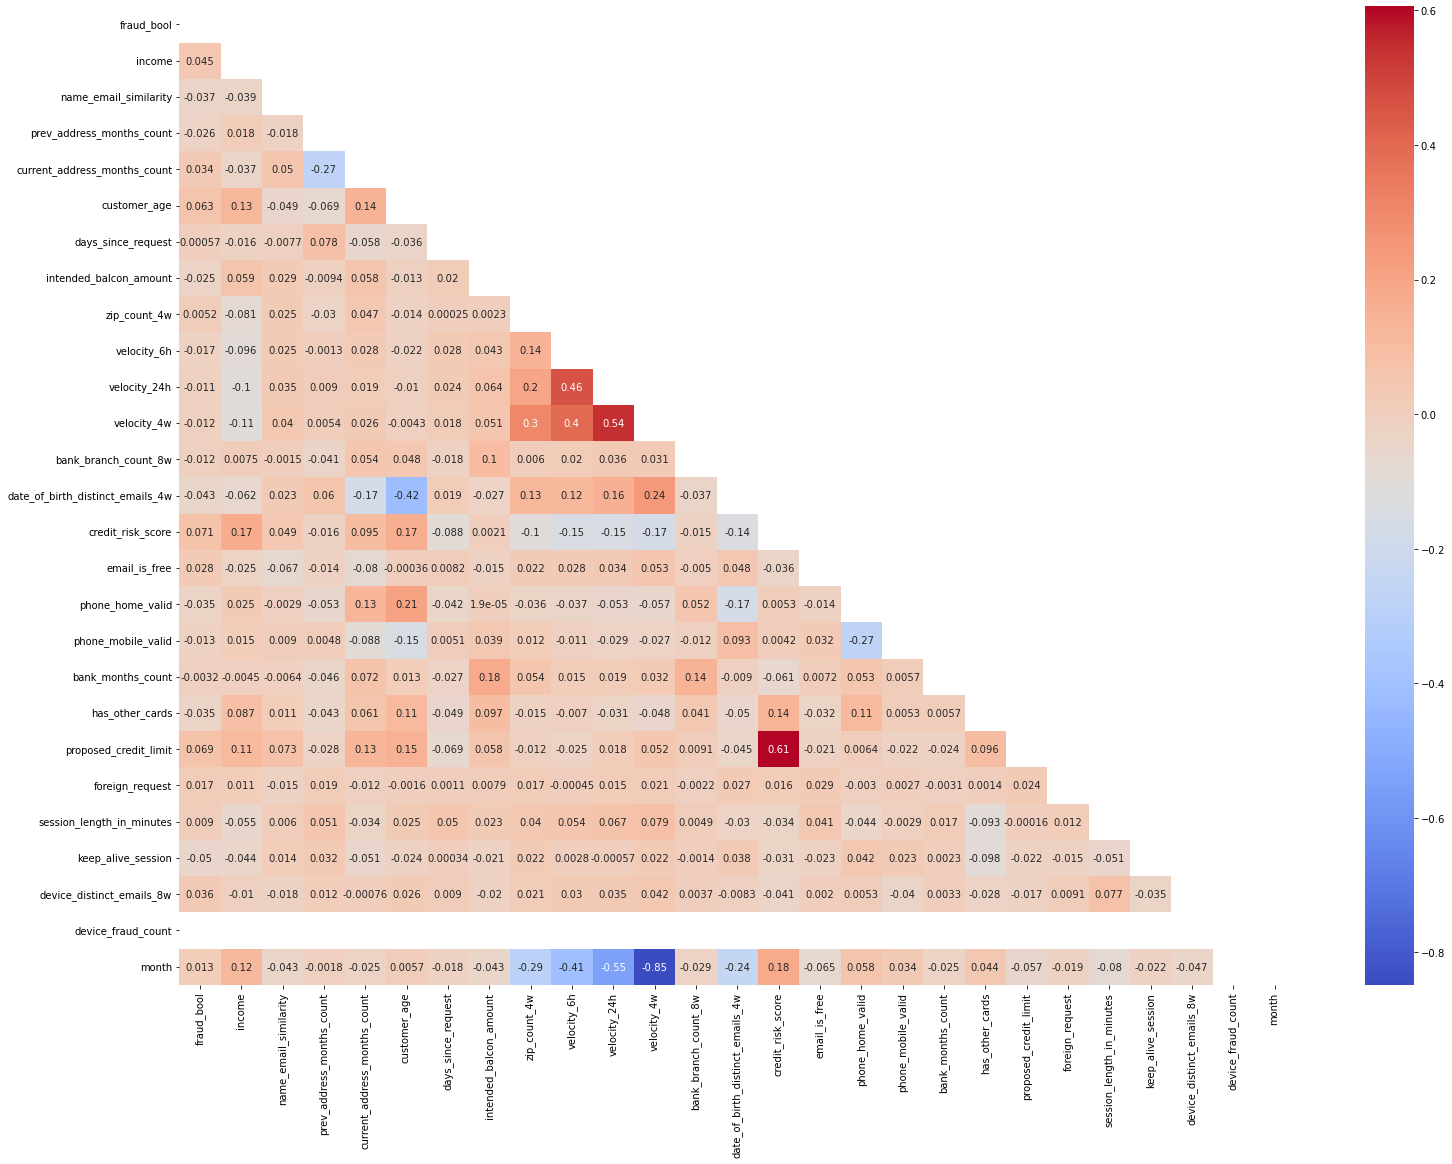

In [65]:
sns.heatmap(bank_fraud.corr(),annot = True, cmap = 'coolwarm',mask = np.triu(bank_fraud.corr()))

#### a.6 checking for wrongly identified datatypes

In [66]:
bank_fraud.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [67]:
bank_fraud.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


<b> All the variables datatypes are correctly identified and assigned </b>

#### a.7 checking for null values in the data

In [68]:
(bank_fraud.isnull().sum()/len(bank_fraud))*100

fraud_bool                          0.0
income                              0.0
name_email_similarity               0.0
prev_address_months_count           0.0
current_address_months_count        0.0
customer_age                        0.0
days_since_request                  0.0
intended_balcon_amount              0.0
payment_type                        0.0
zip_count_4w                        0.0
velocity_6h                         0.0
velocity_24h                        0.0
velocity_4w                         0.0
bank_branch_count_8w                0.0
date_of_birth_distinct_emails_4w    0.0
employment_status                   0.0
credit_risk_score                   0.0
email_is_free                       0.0
housing_status                      0.0
phone_home_valid                    0.0
phone_mobile_valid                  0.0
bank_months_count                   0.0
has_other_cards                     0.0
proposed_credit_limit               0.0
foreign_request                     0.0


<b> The data has no null values present. </b>

#### a.8 checking for outliers in the numerical columns

In [69]:
# selecting the numerical columns to find the outliers

bank_fraud_num = bank_fraud.select_dtypes(include = np.number)

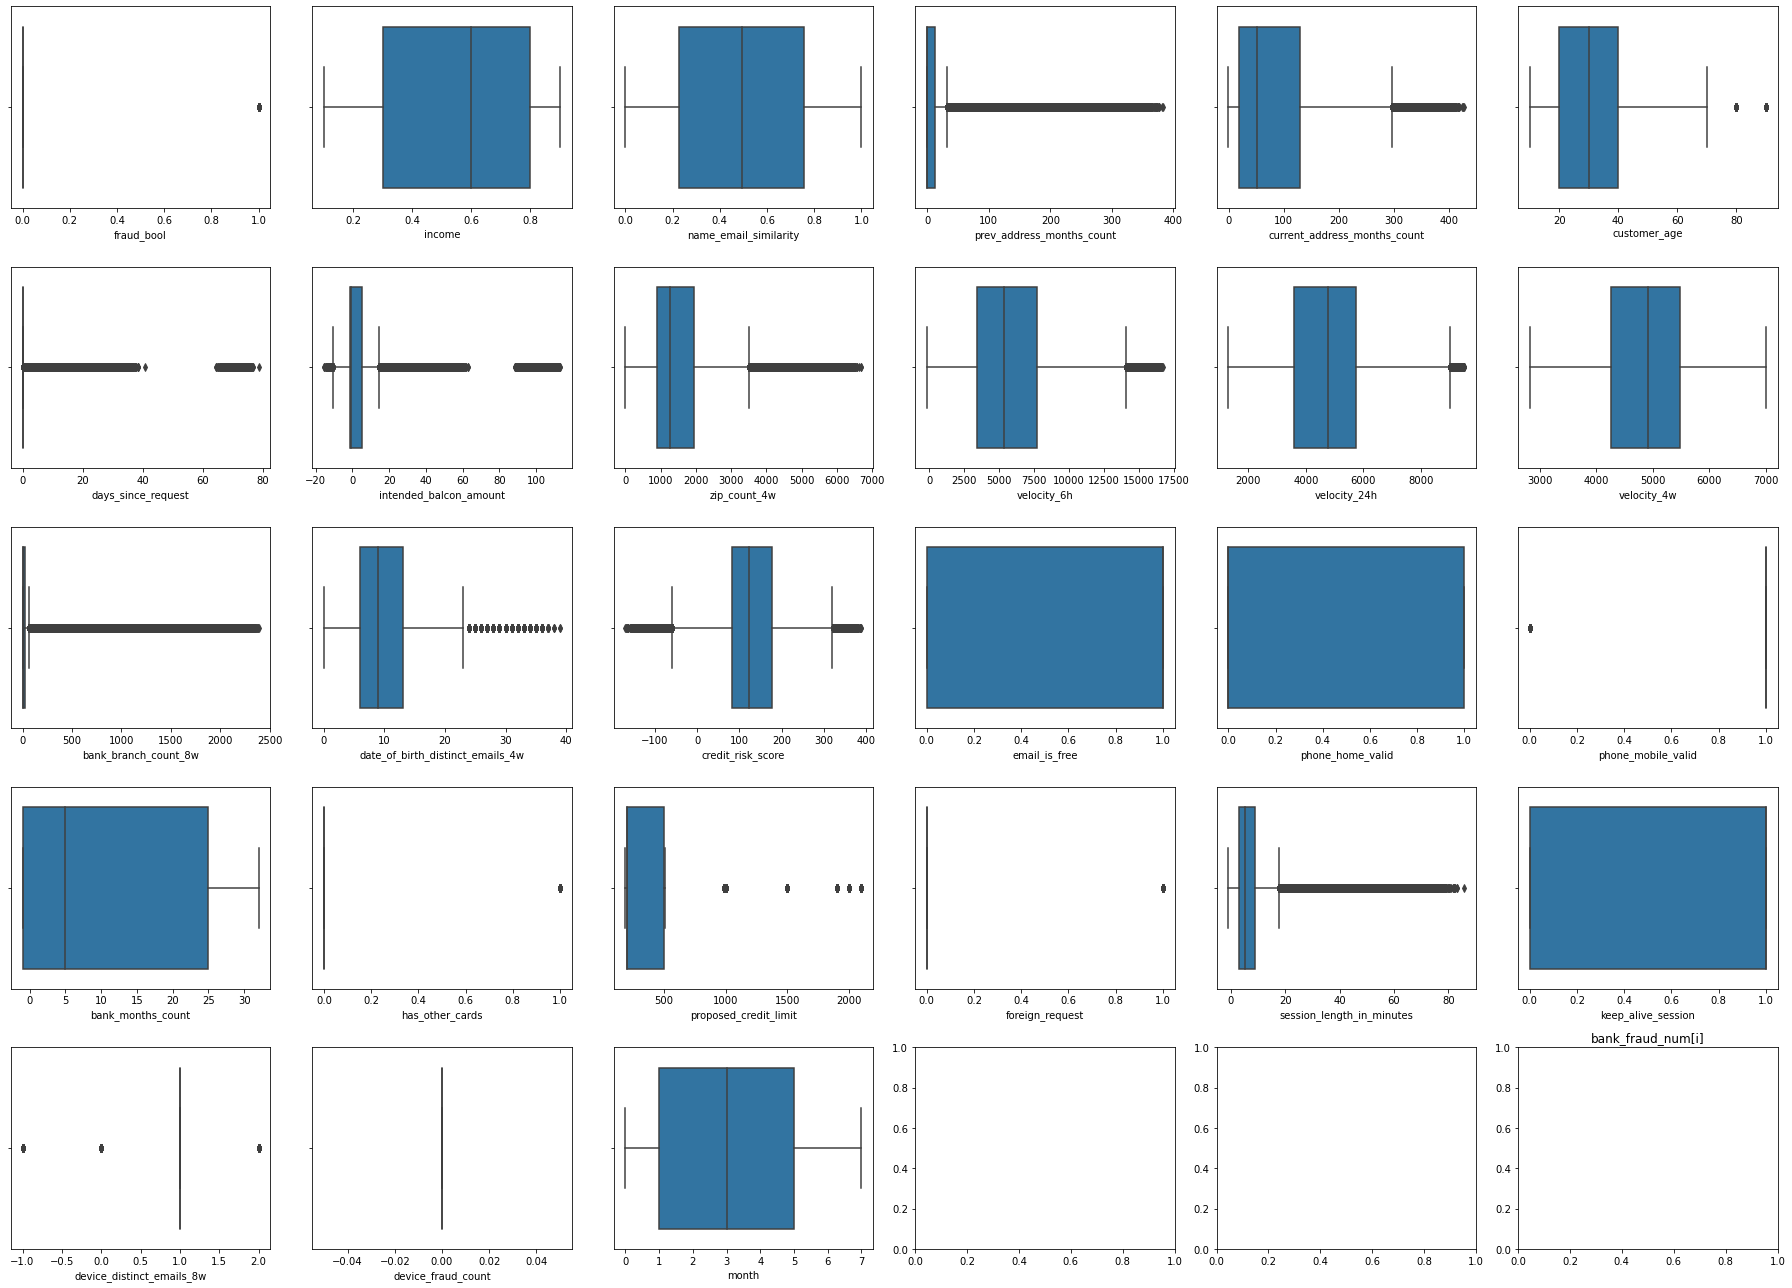

In [70]:
fig,ax = plt.subplots(5,6,figsize = (25,18))
for i,subplots in zip(bank_fraud_num.columns,ax.flatten()):
    sns.boxplot(bank_fraud_num[i],ax = subplots)
    plt.title('bank_fraud_num[i]')
plt.tight_layout()
plt.show()

<b> Outliers are pesent in the data. </b>

- Columns income,prev_address_month_count, current_address_month_count, days_since_request, intended_balcon_amount, zip_count_4w, velocity_4w,cvelocity_6h, velocity_24h, bank_branch_count_8w, date_of_birth_emails_4w, credit_risk_score, session_length_in_minutes have a high number of outliers.
- columns has_other_cards, proposed_credit_card_limit, foreign_request, device_distinct_email_8w, customer_age, phone_mobile_valid have comparatively less frequency of outliers present.
- 'prev_address_months_count','current_address_months_count','days_since_request','intended_balcon_amount','zip_count_4','velocity_6h','velocity_24h','bank_branch_count_8w','date_of_birth_distinct_emails_4w','session_length_in_minutes' are the columns that require outlier treatment.

#### a.9 checking for distribution,skewness,kurtosis of the data

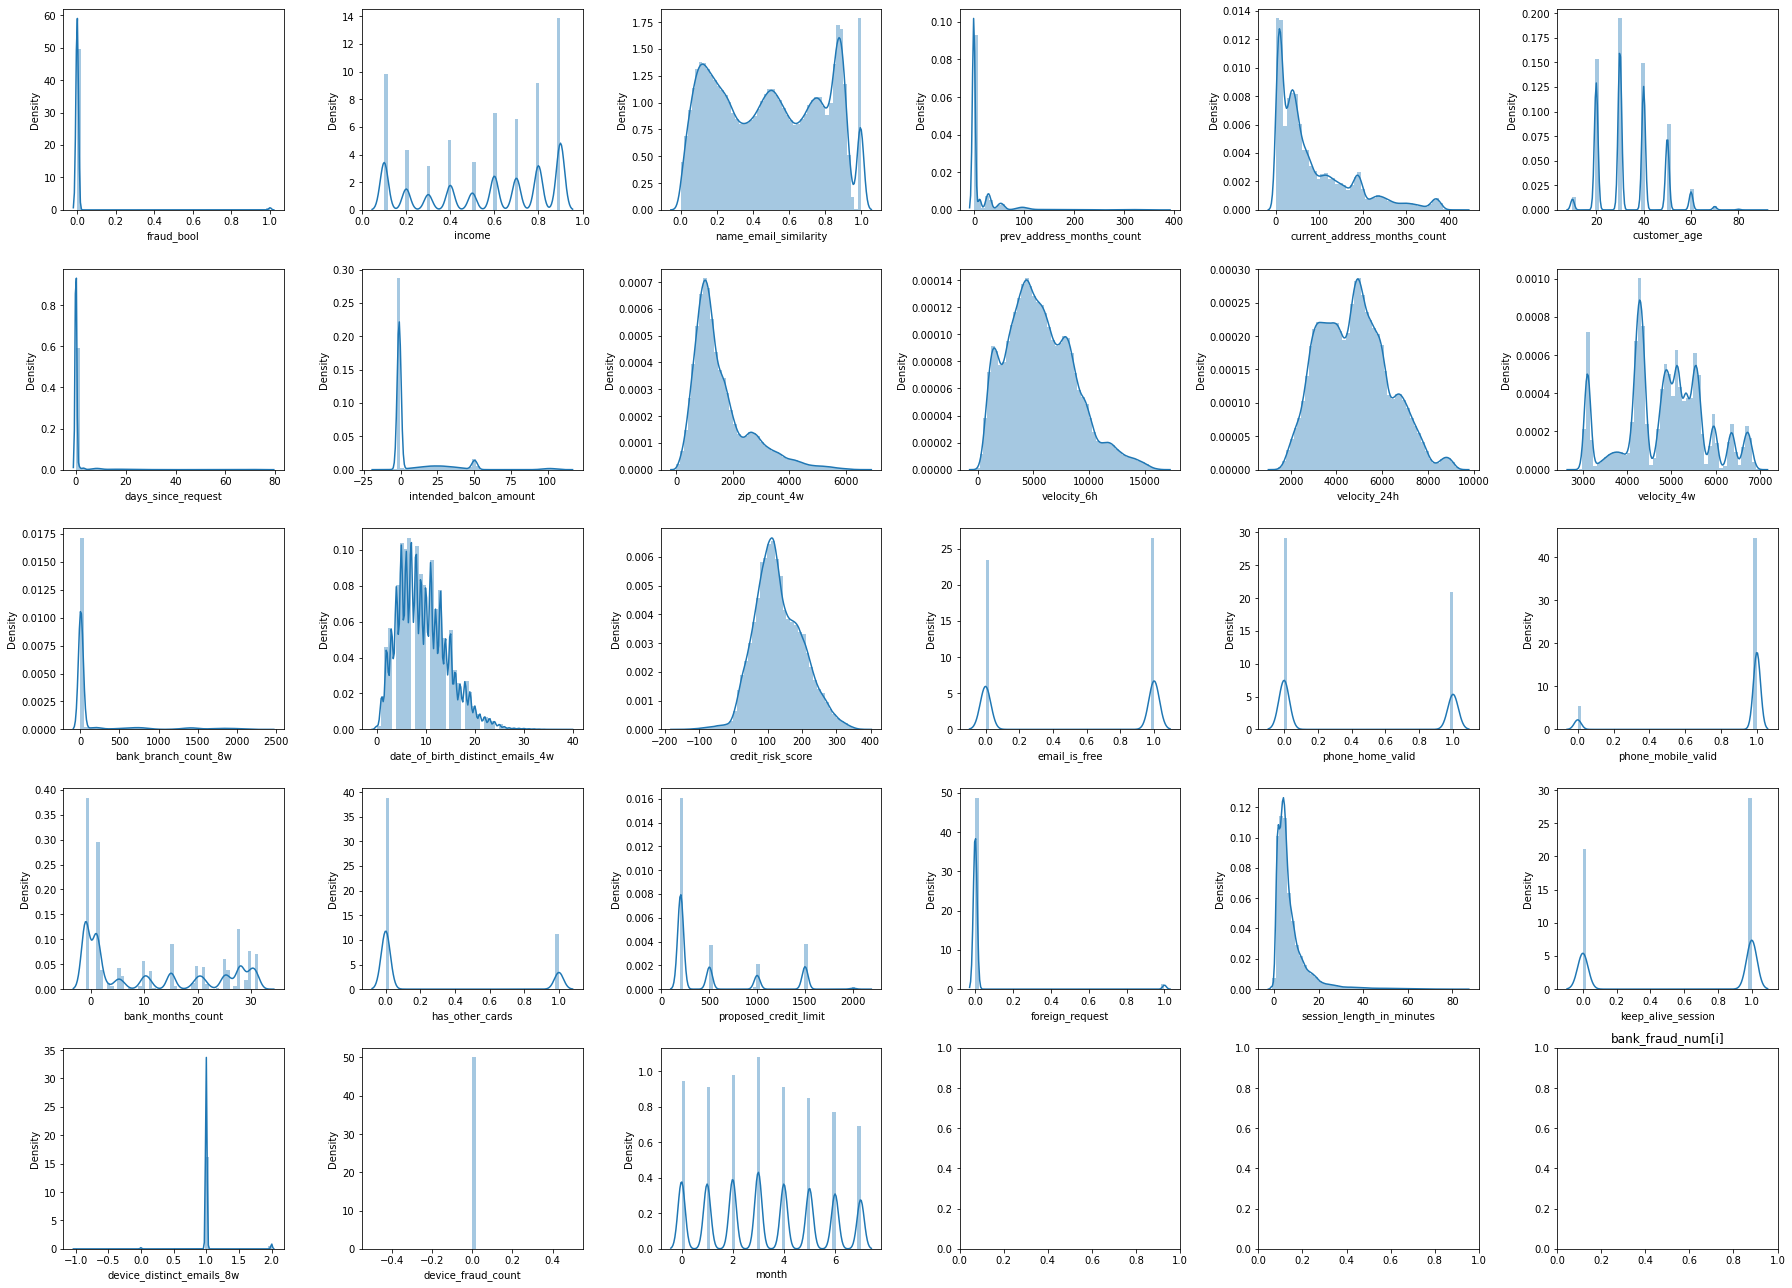

In [71]:
fig,ax = plt.subplots(5,6,figsize = (25,18))
for i,subplots in zip(bank_fraud_num.columns,ax.flatten()):
    sns.distplot(bank_fraud_num[i],ax = subplots)
    plt.title('bank_fraud_num[i]')
plt.tight_layout()
plt.show()

- Columns, Fraud_bool, email_is_free, phone_number_valid, phone_home_valid, has_other_cards, foreing_request, keep_alive_sessions have binary classification(0 and 1).
   - fraud_bool, phone_mobile_valid, foreign_request, has_other_cards have a very high imbalanced distribution of datapoints.
   - All the other columns have a moderately decent distribution of datapoints within the classes.
   
   
- Columns income, customer_age have binned data in multiple numerical classes. It can be observed that for each class the distribution.
   - income shows a marginally moderate difference of distribution among the classes.
   - customer_age displays a high distribution between the range 20 to 40.


- All the other columns have a highly uneven distribution of data.

In [72]:
bank_fraud.skew()

fraud_bool                          9.363838
income                             -0.386337
name_email_similarity               0.042839
prev_address_months_count           4.063888
current_address_months_count        1.386998
customer_age                        0.478079
days_since_request                  9.278955
intended_balcon_amount              2.507173
zip_count_4w                        1.456657
velocity_6h                         0.562682
velocity_24h                        0.331134
velocity_4w                        -0.060125
bank_branch_count_8w                2.747161
date_of_birth_distinct_emails_4w    0.703250
credit_risk_score                   0.295895
email_is_free                      -0.119758
phone_home_valid                    0.336350
phone_mobile_valid                 -2.487616
bank_months_count                   0.488747
has_other_cards                     1.330989
proposed_credit_limit               1.301410
foreign_request                     6.053306
session_le

- Columns prev_address_months_count, days_since_request, foreign_request, session_length_in_minutes have a high positive right skewness in the distribution of the data.


- Columns intended_balcon_amount, current_address_months_count, zip_count_4w, bank_branch_count_8w, has_other_cards, proposed_credit_limit, device_distinct_emails_8w have a moderately low positive right skewd data distribution.


- Columns name_email_similarity, customer_age, velocity_6h, velocity_24h, date_of_birth_distinct_emails_4w, credit_risk_score, phone_home_valid, phone_home_valid, bank_months_count, device_fraud_count, month have a comparatively low positively skewed data distribution.


- Columns income, velocity_4w, email_is_free, phone_mobile_valid, keep_alive_session have a low negatively left skewed data distribution.

In [73]:
bank_fraud.kurt()

fraud_bool                           85.681638
income                               -1.299366
name_email_similarity                -1.280279
prev_address_months_count            20.031089
current_address_months_count          1.356865
customer_age                         -0.115203
days_since_request                  106.569214
intended_balcon_amount                6.846671
zip_count_4w                          2.139983
velocity_6h                           0.002998
velocity_24h                         -0.373654
velocity_4w                          -0.359625
bank_branch_count_8w                  6.502921
date_of_birth_distinct_emails_4w      0.436449
credit_risk_score                     0.068087
email_is_free                        -1.985662
phone_home_valid                     -1.886872
phone_mobile_valid                    4.188243
bank_months_count                    -1.436230
has_other_cards                      -0.228467
proposed_credit_limit                 0.168839
foreign_reque

Kurtosis helps us understand how much data values are present in the tails of the data. It helps us identify any extreme fluctuations between values of features. Kurtosis can be of three types let's see which columns the data for the above dataset falls under :

- Leptokurtic : Features falling under this category can depict presence of high outliers, as they have skinnier and longer tails displayed in their distribution. 
   - Columns income, name_email_similarity, current_address_months_count, customer_age, zip_count_4w, velocity_6h, velocity_24h, velocity_4w, date_of_birth_distinct_emails_4w, credit_risk_score, email_is_free, phone_home_valid, bank_months_count, has_other_cards, proposed_credit_limit, keep_alive_session, device_fraud_count, month have a leptokurtic distribution with kurtosis less than 3.
   

- Platykurtic : Features falling under this category show a stability in the movements of the datapoints with shorter tails.
   - Columns fraud_bool, prev_address_months_count, days_since_request, intended_balcon_amount, bank_branch_count_8w, phone_mobile_valid, foreign_request, session_length_in_minutes are platykurtic in nature with their kurtosis being greater than 3.
   
   
Taking into consideration that some of these columns have binary classification, and binned into certain numerical categories, the distribution, skewness and kurtosis for those columns can be subject to their individual unique classes.   

#### a.10 Finding the distribution of data in the target variable.

Count of values in each class of target variable(fraud_bool) : 
 0    988971
1     11029
Name: fraud_bool, dtype: int64 

AxesSubplot(0.2407,0.125;0.5436x0.755)


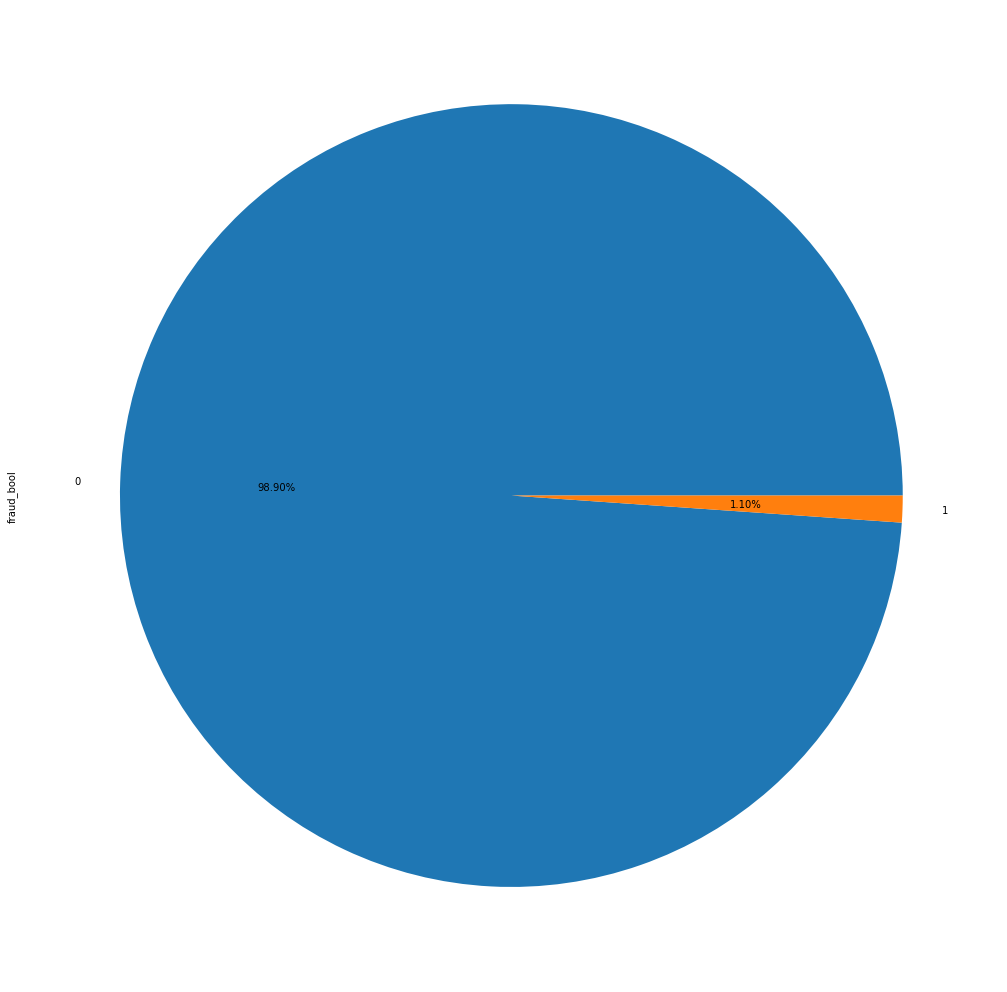

In [74]:
print('Count of values in each class of target variable(fraud_bool) :','\n',bank_fraud['fraud_bool'].value_counts(),'\n')
print(bank_fraud['fraud_bool'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%'))
plt.show()

<b> The data has highly imbalanced weightage for each class. </b>

#### a.11 detecting relevant columns at a glance

In [75]:
# for categorical columns

In [76]:
bank_fraud.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

- From the data understanding we have observed that columns housing_status, employment_status, payment_type have been anonymized for prevention of data security of PII information.
- Since the data is anonymised there is no information provided for the types of categories that are mentioned in the columns.
- Hence the information , inferences taken using these columns won't be much of help to understand their contribution in the model building process.'

In [77]:
# for numerical columns

bank_fraud.std()

fraud_bool                             0.104438
income                                 0.290343
name_email_similarity                  0.289125
prev_address_months_count             44.046230
current_address_months_count          88.406599
customer_age                          12.025799
days_since_request                     5.381835
intended_balcon_amount                20.236155
zip_count_4w                        1005.374565
velocity_6h                         3009.380665
velocity_24h                        1479.212612
velocity_4w                          919.843934
bank_branch_count_8w                 459.625329
date_of_birth_distinct_emails_4w       5.033792
credit_risk_score                     69.681812
email_is_free                          0.499106
phone_home_valid                       0.493076
phone_mobile_valid                     0.313293
bank_months_count                     12.116875
has_other_cards                        0.416251
proposed_credit_limit                487

- device_fraud_count is the only column with zero standard deviation.
- It also has only one class which won't be helpful as in order to identify the weightage of each class.
- having only one class won't help the supervised learning classification models to understand and learn the patterns of each class of the feature.

####  a.12 Statistical Tests for Checking the significance of the variables.

h0 : Variables are significant.

h1 : Variables are insignificant.  

alpha is 0.05

for categorical columns

In [78]:
# for source column

bank_fraud['source'].unique()

array(['INTERNET', 'TELEAPP'], dtype=object)

In [79]:
internet = bank_fraud[bank_fraud['source']=='INTERNET']['fraud_bool']
teleapp = bank_fraud[bank_fraud['source']=='TELEAPP']['fraud_bool']

In [80]:
stats.f_oneway(internet,teleapp)

F_onewayResult(statistic=15.383655613299519, pvalue=8.774983307438286e-05)

In [81]:
# for device_os columns

bank_fraud['device_os'].unique()

array(['windows', 'other', 'linux', 'macintosh', 'x11'], dtype=object)

In [82]:
windows = bank_fraud[bank_fraud['device_os']=='windows']['fraud_bool']
linux = bank_fraud[bank_fraud['device_os']=='linux']['fraud_bool']
macintosh = bank_fraud[bank_fraud['device_os']=='macintosh']['fraud_bool']
x11 = bank_fraud[bank_fraud['device_os']=='x11']['fraud_bool']
other = bank_fraud[bank_fraud['device_os']=='other']['fraud_bool']

In [83]:
stats.f_oneway(windows,linux,macintosh,x11,other)

F_onewayResult(statistic=1630.2909502139098, pvalue=0.0)

- According to the anova test conducted, for device_os column shows a insignificance as pvalue is less than alpha.
- source column seems to show an significance with relation to target variable based on the anova test as their pvalue is more than alpha.

In [84]:
# for numerical columns

stats.ttest_ind(bank_fraud_num,bank_fraud['fraud_bool'])

Ttest_indResult(statistic=array([   0.        , 1787.90352058, 1570.10533448,  379.31718609,
        979.30220669, 2800.37792185,  188.50174698,  427.47026311,
       1564.27372079, 1882.54202523, 3224.53370484, 5279.49663513,
        401.08932994, 1885.35259504, 1879.66435377, 1017.53402355,
        805.62638688, 2660.61180774,  893.61920638,  493.90131329,
       1058.0032673 ,   75.4217724 ,  937.77851594, 1120.71369573,
       4825.0025871 , -105.60295547, 1481.44790015]), pvalue=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

- The pvalue list is showcasing an array where except for the first value all the other numerical values have pvalue less than the alpha, hence it can be concluded that these columns are not significant enough.

In [85]:
#### Creating a copy of the dataframe for further use

df = bank_fraud.copy()

## B. FEATURE ENGINEERING :

#### b.1 binning the required columns

In [86]:
bank_fraud['credit_risk_score'].nunique()

551

The credit risk score column showcases the risk factor of the applicant in numerical form.
- It is also a column that shares a collinearity with the target variable and can be considered as a significant variable based on the standard deviation, pvalue(with reference to the stats test).
- However it also holds a large number of unique values which can be somewhat complicated for the model to learn the patterns from.
- Hence we will be binning the credit score column and change it into a categorical column

In [87]:
print(bank_fraud['credit_risk_score'].max())
print(bank_fraud['credit_risk_score'].min())

389
-170


In [67]:
def cred_score(x):
    if x<=0:
        return 'Risky Applicant'
    if x>0 and x<=100:
        return 'Average Applicant'
    if x >100 and x<=250:
        return 'Good Applicant'
    if x>250:
        return 'Standard Applicant'
    
bank_fraud['credit_risk_score']= bank_fraud['credit_risk_score'].apply(cred_score)

In [51]:
bank_fraud['credit_risk_score'].unique()

array(['Good Applicant', 'Standard Applicant', 'Average Applicant',
       'Risky Applicant'], dtype=object)

In [68]:
# changing the datatype from numerical to object type.

bank_fraud['credit_risk_score'] = bank_fraud['credit_risk_score'].astype('object')

In [69]:
bank_fraud['credit_risk_score'].dtype

dtype('O')

#### b.2 encoding the data

In [92]:
# we'll have to encode the columns first for the categorical columns.

df_encoded = pd.get_dummies(bank_fraud,drop_first=True)
df_encoded.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,credit_risk_score_Good Applicant,credit_risk_score_Risky Applicant,credit_risk_score_Standard Applicant,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,0,1,0,24,0,500.0,0,3.888115,0,1,0,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,1,0,0,15,0,1500.0,0,31.798819,0,1,0,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,1,0,1,-1,0,200.0,0,4.728705,0,1,0,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,1,0,1,31,1,200.0,0,2.047904,0,1,0,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,1,1,0,31,0,1500.0,0,3.775225,1,1,0,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


Let's build a base model to understand the performance,behaviour and pattern findings of the model without making any changes to the original data.

####  BASE MODEL (ORIGINAL DATA) :

building a decision tree model as a base model on the raw data.

In [93]:
df_encoded.shape

(1000000, 50)

In [94]:
# Identifying the dependent and independent variables.

X = df_encoded.drop('fraud_bool',axis = 1)
Y = df_encoded['fraud_bool']

In [95]:
# performing train test split

xtrain_base, xtest_base, ytrain_base, ytest_base = train_test_split(X,Y,test_size=0.3,random_state=1)
print('xtrain dimensions :',xtrain_base.shape)
print('ytrain dimensions :',ytrain_base.shape)
print('xtest dimensions :', xtest_base.shape)
print('ytest dimensions :',ytest_base.shape)

xtrain dimensions : (700000, 49)
ytrain dimensions : (700000,)
xtest dimensions : (300000, 49)
ytest dimensions : (300000,)


In [96]:
dt_base = DecisionTreeClassifier(random_state=1)

dt_base.fit(xtrain_base,ytrain_base)

trainpred_dt_base = dt_base.predict(xtrain_base)
testpred_dt_base = dt_base.predict(xtest_base)
prob = dt_base.predict_proba(xtest_base)
dt_base_pred_prob = prob[:,1]

In [97]:
print('Accuracy table for train data :','\n',classification_report(ytrain_base,trainpred_dt_base),'\n')
print('Accuracy table for test data :','\n',classification_report(ytest_base,testpred_dt_base),'\n')

Accuracy table for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    692366
           1       1.00      1.00      1.00      7634

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000
 

Accuracy table for test data : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    296605
           1       0.07      0.09      0.08      3395

    accuracy                           0.98    300000
   macro avg       0.53      0.54      0.53    300000
weighted avg       0.98      0.98      0.98    300000
 



In [98]:
# important features according to the base decision tree model on the whole data.

important_features_base = pd.DataFrame({'Features(Base model)': xtrain_base.columns,
                                  'importance(base model)': dt_base.feature_importances_})

important_features_base.sort_values('importance(base model)',ascending = False)

,Features(Base model),importance(base model)
5,days_since_request,0.085088
8,velocity_6h,0.084666
1,name_email_similarity,0.084526
10,velocity_4w,0.078091
20,session_length_in_minutes,0.074296
9,velocity_24h,0.073984
7,zip_count_4w,0.073794
6,intended_balcon_amount,0.073133
3,current_address_months_count,0.060706
11,bank_branch_count_8w,0.039122


- looking at the accuracy score we can say that the model is going into overfit condition.
- since there is an imbalance in data it is obvious that the model will only learn the behaviour and pattern of one class at a stretch. this can be a big problem as the model should be able to understand the patterns for both the classes to properly identify the presence of fraudulent activities.

<b> A model can go into overfitting condition for several reasons : </b>


- If there is presence of imbalance in the variables data -
    - It was observed that the target variable consists of highly imbalanced data.
    - An imbalance in the classes of variables makes the model highly trained in just one class where as the model fails to understand and learn the patterns in the minority classes that can help in proper identification of the classes for prediction.
    
    
- If there is alot of noise present in the data -
    - The data consists of extreme outliers in multiple columns
    
    
- If there is any irrelevant features/information present in the data.
    - Through the statistical hypothesis tests conducted earlier it can be determined that there are a few columns that can be considered as irrelevant or of insignificance as they share a very low relation with the target variable.
    

<b>Since the data is avaliable in high volume, we can start by sampling the data.</b>


Sampling helps us in selecting a random batch of the data which can be validated as an representation of the data and used for model building.

We've decided to take a sample of 25% of the data. 

The further process can be done in multiple ways,

For method 1 - We will rebuild a model on the sample data by applying smote and treating the outliers for all the columns

For method 2 - We will select features that show a significance with respect to the target variable. These features can be derived by checking the multi correlation between them(), Taking help of the statistical tests performed for the same.

For method 3 - Sampling based on the month and spliiting the data into train and test set.

In [99]:
gnb_base = GaussianNB()

gnb_base.fit(xtrain_base,ytrain_base)

trainpred_gnb_base = gnb_base.predict(xtrain_base)
testpred_gnb_base = gnb_base.predict(xtest_base)
prob7 = gnb_base.predict_proba(xtest_base)
predproba_gnb_base = prob[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain_base,trainpred_gnb_base),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest_base,testpred_gnb_base),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest_base,testpred_gnb_base))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.99      0.90      0.95    692366
           1       0.05      0.49      0.10      7634

    accuracy                           0.90    700000
   macro avg       0.52      0.70      0.52    700000
weighted avg       0.98      0.90      0.94    700000
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.99      0.90      0.95    296605
           1       0.05      0.48      0.10      3395

    accuracy                           0.90    300000
   macro avg       0.52      0.69      0.52    300000
weighted avg       0.98      0.90      0.94    300000
 

The Cohen kappa score of the model : 0.07683920066368222


## METHOD 1 :

- Over sampling will be performed on the dataset as their is imbalance present in the classes of the target variable.
- SMOTE method from the imblearn library will be uitlised to for over sampling.
- SMOTE ( Synthetic minority over sampling technique ) is a technique where the synthetic samples are generated fir minority class.

In [100]:
# SMOTE will be performed on the dependent and independent variables identified earlier.

sm = SMOTE(sampling_strategy='auto',random_state=1)

X_new, Y_new = sm.fit_resample(X,Y)

df_smote = pd.concat([X_new,Y_new])

print('Distribution of classes after over sampling :','\n',Y_new.value_counts().sort_index())

Distribution of classes after over sampling : 
 0    988971
1    988971
Name: fraud_bool, dtype: int64


In [101]:
df_smote.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,credit_risk_score_Good Applicant,credit_risk_score_Risky Applicant,credit_risk_score_Standard Applicant,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,0
0,0.9,0.166828,-1.0,88.0,50.0,0.020925,-1.331345,769.0,10650.765523,3134.319630,3863.647740,1.0,6.0,0.0,1.0,0.0,24.0,0.0,500.0,0.0,3.888115,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
1,0.9,0.296286,-1.0,144.0,50.0,0.005418,-0.816224,366.0,534.047319,2670.918292,3124.298166,718.0,3.0,1.0,0.0,0.0,15.0,0.0,1500.0,0.0,31.798819,0.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2,0.9,0.044985,-1.0,132.0,40.0,3.108549,-0.755728,870.0,4048.534263,2893.621498,3159.590679,1.0,14.0,1.0,0.0,1.0,-1.0,0.0,200.0,0.0,4.728705,0.0,1.0,0.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
3,0.9,0.159511,-1.0,22.0,50.0,0.019079,-1.205124,810.0,3457.064063,4054.908412,3022.261812,1921.0,6.0,1.0,0.0,1.0,31.0,1.0,200.0,0.0,2.047904,0.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.9,0.596414,-1.0,218.0,50.0,0.004441,-0.773276,890.0,5020.341679,2728.237159,3087.670952,1990.0,2.0,1.0,1.0,0.0,31.0,0.0,1500.0,0.0,3.775225,1.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


#### Model (data with SMOTE technique) :

In [102]:
# let's build a model for the above dataframe.

# we'll perform train test split on the data first

xtrain_sm, xtest_sm, ytrain_sm, ytest_sm = train_test_split(X_new, Y_new,test_size=0.3,random_state=1)

print('Shape of train data :',xtrain_sm.shape,'\n')
print('Shape of test data :',xtest_sm.shape,'\n')
print('Shape of train data :',ytrain_sm.shape,'\n')
print('Shape of test data :',ytest_sm.shape,'\n')

Shape of train data : (1384559, 49) 

Shape of test data : (593383, 49) 

Shape of train data : (1384559,) 

Shape of test data : (593383,) 



In [35]:
# Building a random forest model 

rf = RandomForestClassifier()

rf_smote = rf.fit(xtrain_sm,ytrain_sm)

trainpred_rf_smote = rf_smote.predict(xtrain_sm)
testpred_rf_smote = rf_smote.predict(xtest_sm)
prob1 = rf_smote.predict_proba(xtest_sm)
rf_smote_pred_prob = prob[:,1]

print('Accuracy table for train data :','\n',classification_report(ytrain_sm,trainpred_rf_smote),'\n')
print('Accuracy table for test data :','\n',classification_report(ytest_sm,testpred_rf_smote),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest_sm,testpred_rf_smote))

NameError: name 'xtrain_sm' is not defined

- It Can be observed that the accuaracy score is higher indicating an overfit condition.

#### MODEL (with sample dataset of selected features) :

Observing the Statistical analysis, Multi correlation, standard deviation and feature importance based on the base model the following vairable have been selected. 

1. income
2. name_email_similarity	
3. days_since_request
4. velocity_6h
5. velocity_4w
6. session_length_in_minutes
7. velocity_24h
8. zip_count_4w
9. intended_balcon_amount
10. current_address_months_count
11. bank_branch_count_8w
12. date_of_birth_distinct_emails_4w
13. proposed_credit_limit
14. bank_months_count
15. credit_risk_score
16. source

The above columns have shown a significance with respect to the target variable column fraud_bool. The following columns will be selected for Model building.

In [3]:
# creating a dataframe of the selected features

df_features = bank_fraud[['income','name_email_similarity','days_since_request','velocity_6h','velocity_4w',
                  'session_length_in_minutes','velocity_24h','zip_count_4w','intended_balcon_amount',
                 'current_address_months_count','bank_branch_count_8w','date_of_birth_distinct_emails_4w',
                 'proposed_credit_limit','bank_months_count','credit_risk_score','source','fraud_bool']]

df_features.head()

,income,name_email_similarity,days_since_request,velocity_6h,velocity_4w,session_length_in_minutes,velocity_24h,zip_count_4w,intended_balcon_amount,current_address_months_count,bank_branch_count_8w,date_of_birth_distinct_emails_4w,proposed_credit_limit,bank_months_count,credit_risk_score,source,fraud_bool
0,0.9,0.166828,0.020925,10650.765523,3863.647740,3.888115,3134.319630,769,-1.331345,88,1,6,500.0,24,185,INTERNET,1
1,0.9,0.296286,0.005418,534.047319,3124.298166,31.798819,2670.918292,366,-0.816224,144,718,3,1500.0,15,259,INTERNET,1
2,0.9,0.044985,3.108549,4048.534263,3159.590679,4.728705,2893.621498,870,-0.755728,132,1,14,200.0,-1,177,INTERNET,1
3,0.9,0.159511,0.019079,3457.064063,3022.261812,2.047904,4054.908412,810,-1.205124,22,1921,6,200.0,31,110,INTERNET,1
4,0.9,0.596414,0.004441,5020.341679,3087.670952,3.775225,2728.237159,890,-0.773276,218,1990,2,1500.0,31,295,INTERNET,1


#### Since the datasize of the dataset is larger, sampling will bec. done for model building.

- Sampling with probability will ensure that every member of the dataset gets equal variance.
- It helps us in performing optimum model building solutions which can be utilised for the main dataset as well.

In [4]:
# creating a sample 

feat_samp = df_features.sample(frac = 0.50)
feat_samp.head()

,income,name_email_similarity,days_since_request,velocity_6h,velocity_4w,session_length_in_minutes,velocity_24h,zip_count_4w,intended_balcon_amount,current_address_months_count,bank_branch_count_8w,date_of_birth_distinct_emails_4w,proposed_credit_limit,bank_months_count,credit_risk_score,source,fraud_bool
96974,0.9,0.309587,0.000885,3832.095486,4849.356632,6.434204,4713.876160,3084,-0.879528,15,2,8,500.0,-1,199,INTERNET,1
685574,0.4,0.133618,0.003219,11515.555036,6411.209456,63.757769,6906.592727,1471,24.136573,182,51,4,200.0,2,107,INTERNET,0
42795,0.8,0.851099,0.007703,781.962231,3100.544945,9.002403,3394.384796,833,-0.768225,12,0,8,500.0,-1,191,INTERNET,0
226408,0.8,0.689473,0.018246,1180.476057,4988.263871,7.271961,6490.613513,892,-0.710472,148,42,4,1000.0,1,203,INTERNET,0
431477,0.8,0.849058,0.044699,10169.156404,5545.571696,7.818967,8261.172284,1332,-0.573618,118,42,16,200.0,10,46,INTERNET,0


In [58]:
feat_samp.shape

(100000, 17)

In [107]:
feat_samp['fraud_bool'].value_counts()/len(feat_samp)

0    0.98916
1    0.01084
Name: fraud_bool, dtype: float64

In [5]:
# encoding the data

feat_sampenc = pd.get_dummies(feat_samp,drop_first = True)

In [6]:
#### Building a model without outlier treatment

X = feat_sampenc.drop('fraud_bool',axis = 1)
Y = feat_sampenc['fraud_bool']

In [7]:
# we'll Perform smote as their is a high imbalance in the data.

sm = SMOTE(sampling_strategy='auto',random_state=1)

X_new, Y_new = sm.fit_resample(X,Y)

df_smote = pd.concat([X_new,Y_new])

print('Distribution of classes after over sampling :','\n',Y_new.value_counts().sort_index())

Distribution of classes after over sampling : 
 0    98902
1    98902
Name: fraud_bool, dtype: int64


In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new, Y_new, test_size=0.3, random_state = 1)

#### BOOSTING TECHNIQUE :

- Due to high imbalance in the data, Outlier treatment risks the possibility of elimination class 1.
- Although they are sensitive to outliers, Boosting models are also known reduces the errors in the data.
- Boosting models help imporve the overall acuuracy of the overall system by training multiple models(ensembles) one after the another.

#### MODEL ( XGBoost) :

In [128]:
xgb = XGBClassifier(random_state = 1)

xgb.fit(xtrain,ytrain)

trainpred_xgb = xgb.predict(xtrain)
testpred_xgb = xgb.predict(xtest)
prob2 = xgb.predict_proba(xtest)
predproba_xgb = prob2[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_xgb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_xgb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_xgb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     69168
           1       1.00      0.99      0.99     69303

    accuracy                           0.99    138471
   macro avg       0.99      0.99      0.99    138471
weighted avg       0.99      0.99      0.99    138471
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     29740
           1       0.99      0.99      0.99     29605

    accuracy                           0.99     59345
   macro avg       0.99      0.99      0.99     59345
weighted avg       0.99      0.99      0.99     59345
 

The Cohen kappa score of the model : 0.979306923165852


- The model ois once again going into overfit condition.

#### Let's perform hyper parameter tuning for the xgb model

In [138]:
xgb = XGBClassifier()

xgb_params = ({'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                   'max_depth':range(2,5),
                   'gamma':[1,2,3,4]})

xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_params, cv = 5)

xgb_grid.fit(xtrain,ytrain)

xgb_grid.best_params_

{'gamma': 2, 'learning_rate': 0.6, 'max_depth': 4}

In [112]:
xgb_model = XGBClassifier(learning_rate= 0.6,
                         max_depth =4,
                         gamma =2,
                         random_state = 1)

xgb_model.fit(xtrain,ytrain)

trainpred_xgb = xgb_model.predict(xtrain)
testpred_xgb = xgb_model.predict(xtest)
prob3 = xgb_model.predict_proba(xtest)
predproba_xgb = prob3[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_xgb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_xgb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_xgb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     69186
           1       0.99      0.98      0.99     69296

    accuracy                           0.99    138482
   macro avg       0.99      0.99      0.99    138482
weighted avg       0.99      0.99      0.99    138482
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     29730
           1       0.99      0.98      0.98     29620

    accuracy                           0.98     59350
   macro avg       0.98      0.98      0.98     59350
weighted avg       0.98      0.98      0.98     59350
 

The Cohen kappa score of the model : 0.9680533008926087


In [ ]:
#### : Let's try some other boosting techniques for model building

#### MODEL (Gradient boosting):

In [139]:
gb_model = GradientBoostingClassifier(n_estimators=200,random_state=1)

gb_model.fit(xtrain,ytrain)

trainpred_gb = gb_model.predict(xtrain)
testpred_gb = gb_model.predict(xtest)
prob4 = gb_model.predict_proba(xtest)
predproba_gb = prob4[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_gb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_gb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_gb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     69168
           1       0.98      0.95      0.96     69303

    accuracy                           0.96    138471
   macro avg       0.96      0.96      0.96    138471
weighted avg       0.96      0.96      0.96    138471
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     29740
           1       0.98      0.95      0.96     29605

    accuracy                           0.96     59345
   macro avg       0.96      0.96      0.96     59345
weighted avg       0.96      0.96      0.96     59345
 

The Cohen kappa score of the model : 0.9276718105985825


#### MODEL (ADABoost) :

In [132]:
ada_model = AdaBoostClassifier(n_estimators = 150,random_state = 1)

ada_model.fit(xtrain,ytrain)

trainpred_ada = ada_model.predict(xtrain)
testpred_ada = ada_model.predict(xtest)
prob5 = ada_model.predict_proba(xtest)
predproba_ada = prob5[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_ada),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_ada),'\n')

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     69168
           1       0.94      0.93      0.93     69303

    accuracy                           0.93    138471
   macro avg       0.93      0.93      0.93    138471
weighted avg       0.93      0.93      0.93    138471
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     29740
           1       0.94      0.93      0.93     29605

    accuracy                           0.93     59345
   macro avg       0.93      0.93      0.93     59345
weighted avg       0.93      0.93      0.93     59345
 



#### MODEL (GaussianNB) :

In [134]:
gnb_model = GaussianNB()

gnb_model.fit(xtrain,ytrain)

trainpred_gnb = gnb_model.predict(xtrain)
testpred_gnb = gnb_model.predict(xtest)
prob6 = gnb_model.predict_proba(xtest)
predproba_gnb = prob6[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_gnb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_gnb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_gnb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.77      0.51      0.62     69168
           1       0.64      0.85      0.73     69303

    accuracy                           0.68    138471
   macro avg       0.70      0.68      0.67    138471
weighted avg       0.70      0.68      0.67    138471
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.78      0.52      0.62     29740
           1       0.64      0.85      0.73     29605

    accuracy                           0.68     59345
   macro avg       0.71      0.69      0.68     59345
weighted avg       0.71      0.68      0.68     59345
 

The Cohen kappa score of the model : 0.3704276526187783


### Since the models are going into overfit condition. Let's try regularisation techniques.

### Regularization :

- Ridge()
- Lasso()
- Elasticnet()

In [143]:
# FOR RIDGE 

ridge = Ridge()

# creating a list parameter

params = {'alpha':[0.1,0.2,0.3,0.4,0.5,1,2,5,7,10,12]}

# Performing grid search cv

r_grid = GridSearchCV(estimator=ridge,param_grid=params,scoring = 'neg_mean_squared_error',cv = 5)

r_grid.fit(xtrain,ytrain)

r_grid.best_params_

{'alpha': 0.4}

In [63]:
ridge = RidgeClassifier()

ridge_model = ridge.fit(xtrain,ytrain)

trainpred_r = ridge_model.predict(xtrain)
testpred_r = ridge_model.predict(xtest)

print('Train Score :',ridge_model.score(xtrain,ytrain))
print('Test Score :',ridge_model.score(xtest,ytest))

Train Score : 0.7439470110658462
Test Score : 0.7482556375771059


In [50]:
ridge = RidgeClassifier(alpha = 0.04)

ridge_model = ridge.fit(xtrain,ytrain)

trainpred_r = ridge_model.predict(xtrain)
testpred_r = ridge_model.predict(xtest)

print('Train Score :',ridge_model.score(xtrain,ytrain))
print('Test Score :',ridge_model.score(xtest,ytest))

Train Score : 0.7346083065709234
Test Score : 0.7381325250484129


In [64]:
ridge = RidgeClassifierCV(alphas=(0.1,0.2,0.3,0.4,0.5,0.7,1.0,5.0,7.0),cv=5)

ridgecv_model = ridge.fit(xtrain,ytrain)

trainpred_rcv = ridgecv_model.predict(xtrain)
testpred_rcv = ridgecv_model.predict(xtest)

print('Train Score :',ridgecv_model.score(xtrain,ytrain))
print('Test Score :',ridgecv_model.score(xtest,ytest))

Train Score : 0.7439108953800815
Test Score : 0.7481713688610241


In [66]:
ridgecv_model.alpha_

7.0

In [67]:
len(ridgecv_model.feature_names_in_)

18

In [65]:
# ELASTICNET CV

encv = ElasticNetCV(l1_ratio=(0.1,0.2,0.3,0.4,0.5,0.7,1.0,5.0,7.0),
                   alphas=(0.1,0.2,0.3,0.4,0.5,0.7,1.0,5.0,7.0), cv = 5)

encv_model = encv.fit(xtrain,ytrain)

trainpred_encv = encv_model.predict(xtrain)
testpred_rcv = encv_model.predict(xtest)

print('Train Score :',encv_model.score(xtrain,ytrain))
print('Test Score :',encv_model.score(xtest,ytest))

Train Score : 0.2527826016112946
Test Score : 0.2582179039778709


In [68]:
len(encv_model.feature_names_in_)

18

## MODEL (selected features + smote + outlier treatment)

In [9]:
featsamp_1 = df_features.sample(frac = 0.25)
featsamp_1.head()

,income,name_email_similarity,days_since_request,velocity_6h,velocity_4w,session_length_in_minutes,velocity_24h,zip_count_4w,intended_balcon_amount,current_address_months_count,bank_branch_count_8w,date_of_birth_distinct_emails_4w,proposed_credit_limit,bank_months_count,credit_risk_score,source,fraud_bool
107613,0.9,0.364980,0.035380,5490.793704,4920.767426,3.111385,4223.230114,1671,-0.802672,13,15,11,500.0,20,222,INTERNET,0
64217,0.6,0.511234,0.011400,5055.693868,3115.201443,4.275663,3685.149936,332,-0.759628,5,0,5,200.0,-1,131,INTERNET,0
334457,0.8,0.016665,0.012926,4453.249416,5321.631240,4.084858,3697.903602,1274,15.302067,18,637,15,500.0,10,93,INTERNET,0
363007,0.4,0.706493,8.888116,6685.148602,5517.522643,4.825601,8088.321395,1757,49.009220,40,22,15,200.0,30,73,INTERNET,0
99893,0.9,0.074564,0.004626,1754.479857,4718.645419,24.623296,6367.530967,965,-1.477862,178,597,4,1500.0,31,190,INTERNET,0


In [10]:
num = featsamp_1.select_dtypes(include = np.number)

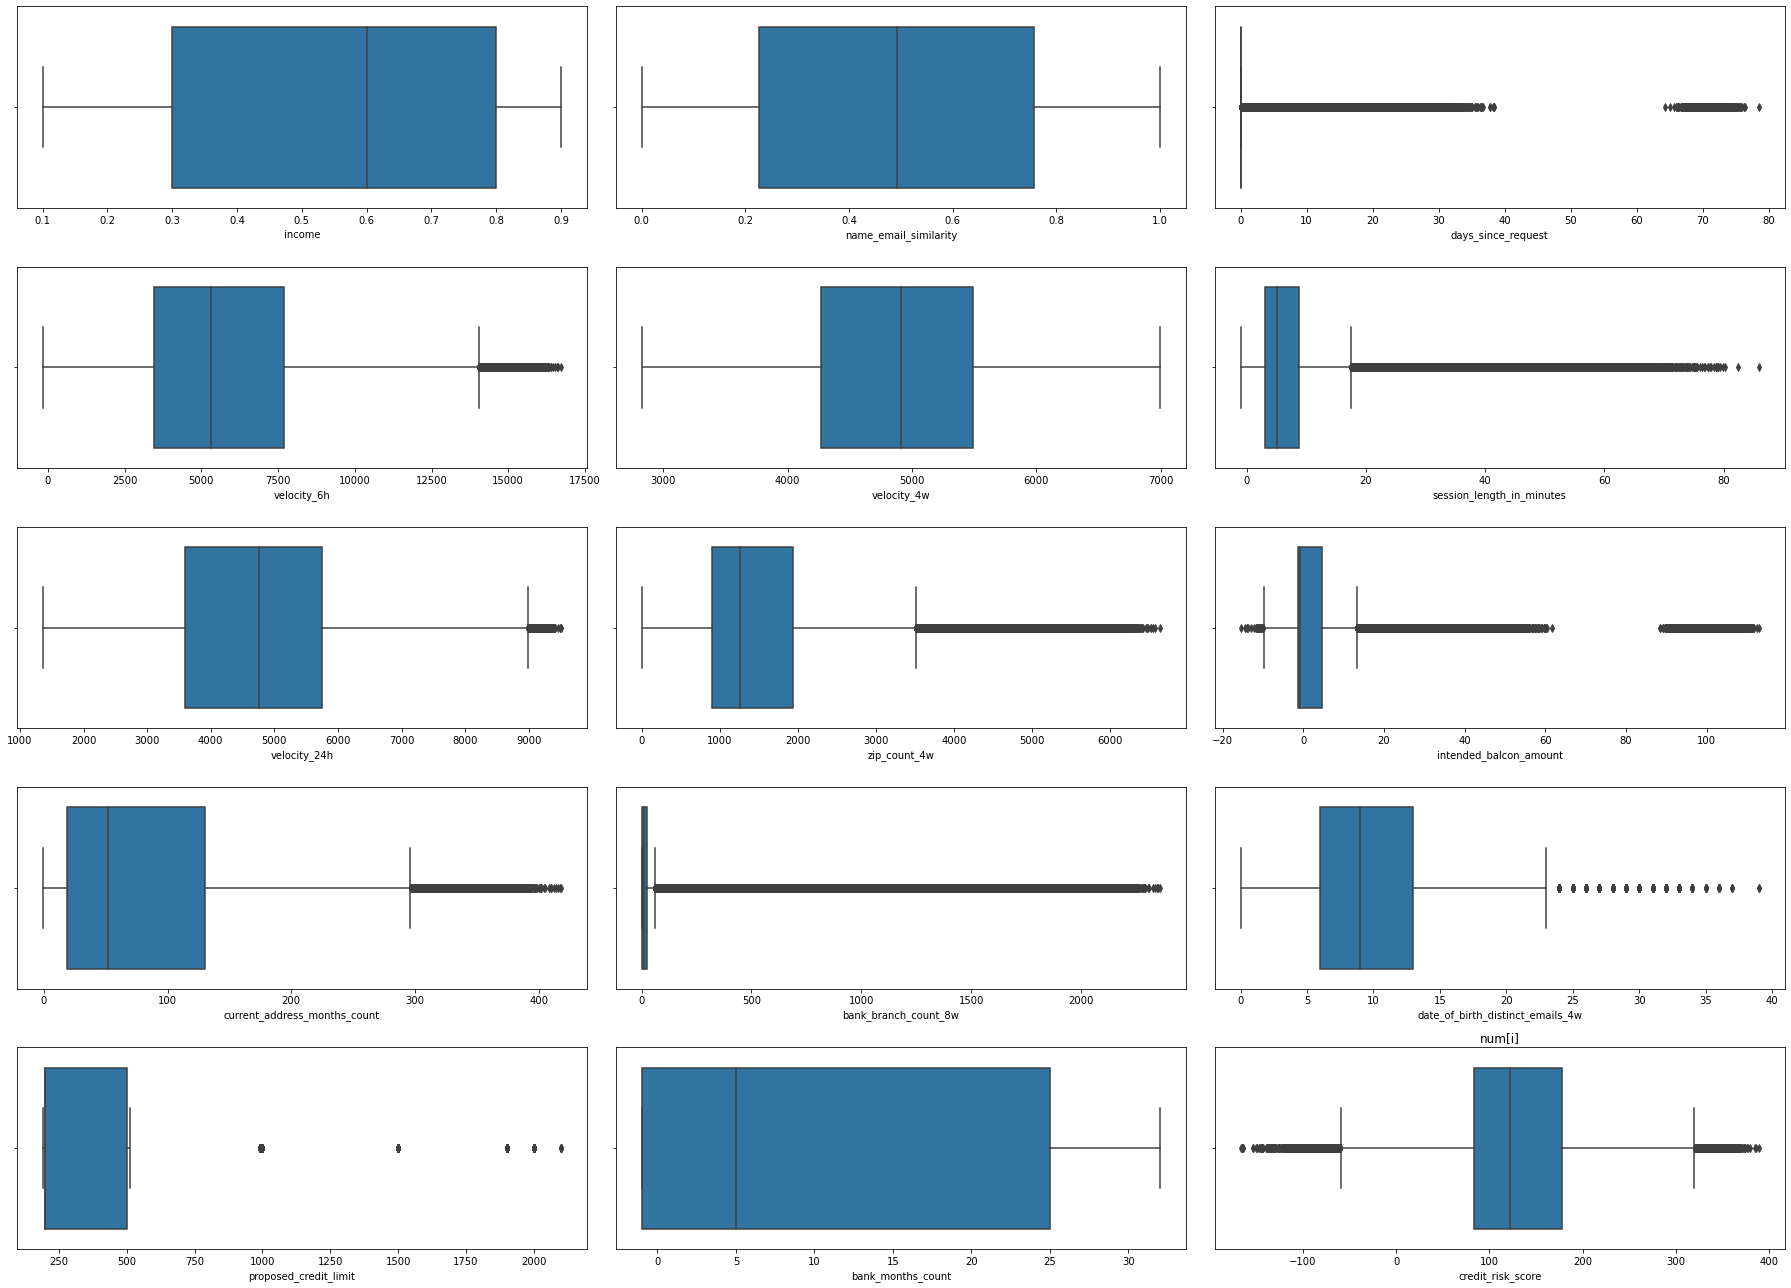

In [11]:
fig,ax = plt.subplots(5,3,figsize = (25,18))
for i,subplots in zip(num.columns,ax.flatten()):
    sns.boxplot(num[i],ax = subplots)
    plt.title('num[i]')
plt.tight_layout()
plt.show()

In [13]:
# FOR OUTLIER TREATMENT

df_out = featsamp_1.drop('fraud_bool',axis = 1)
df_out.shape

(250000, 16)

In [14]:
q1 =df_out.quantile(0.25)
q3= df_out.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

df_out = df_out[~((df_out < (lower_limit)) | (df_out > (upper_limit))).any(axis=1)].index

In [15]:
samp_outliers = featsamp_1.loc[df_out]
samp_outliers.head()

,income,name_email_similarity,days_since_request,velocity_6h,velocity_4w,session_length_in_minutes,velocity_24h,zip_count_4w,intended_balcon_amount,current_address_months_count,bank_branch_count_8w,date_of_birth_distinct_emails_4w,proposed_credit_limit,bank_months_count,credit_risk_score,source,fraud_bool
107613,0.9,0.364980,0.035380,5490.793704,4920.767426,3.111385,4223.230114,1671,-0.802672,13,15,11,500.0,20,222,INTERNET,0
64217,0.6,0.511234,0.011400,5055.693868,3115.201443,4.275663,3685.149936,332,-0.759628,5,0,5,200.0,-1,131,INTERNET,0
878063,0.2,0.569142,0.037060,6932.009906,4782.740209,0.974575,2385.016217,1909,-1.000849,47,14,19,200.0,15,11,INTERNET,0
36953,0.9,0.051823,0.028350,3469.493712,3097.510305,9.488838,2582.667252,426,-1.424225,1,2,9,500.0,-1,218,INTERNET,0
389313,0.1,0.079309,0.005325,13907.185111,5389.797374,10.665195,7193.690009,1689,-1.192832,224,8,10,200.0,2,95,INTERNET,0


In [82]:
samp_outliers.shape

(93534, 17)

In [83]:
samp_outliers.isnull().sum()

income                              0
name_email_similarity               0
days_since_request                  0
velocity_6h                         0
velocity_4w                         0
session_length_in_minutes           0
velocity_24h                        0
zip_count_4w                        0
intended_balcon_amount              0
current_address_months_count        0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
proposed_credit_limit               0
bank_months_count                   0
credit_risk_score                   0
source                              0
fraud_bool                          0
dtype: int64

In [16]:
sampenc = pd.get_dummies(samp_outliers,drop_first=True)
sampenc.shape

(93025, 17)

In [17]:
### Performing SMOTE for balncing the classes in target variable

X = sampenc.drop("fraud_bool", axis=1)
Y = sampenc["fraud_bool"]

In [18]:

sm = SMOTE(sampling_strategy='auto',random_state=1)
X_new, Y_new = sm.fit_resample(X,Y)

df_smote = pd.concat([X_new,Y_new])

print('Distribution of classes after over sampling :','\n',Y_new.value_counts().sort_index())

Distribution of classes after over sampling : 
 0    92209
1    92209
Name: fraud_bool, dtype: int64


In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new, Y_new, test_size=0.3, random_state = 1)

#### Decision Tree :

In [102]:
dt = DecisionTreeClassifier()

dt_params = [{'criterion':['entropy','gini'],
             'max_features':['sqrt','log2'],
             'max_depth':range(2,8),
             'min_samples_split':range(2,8),
             'min_samples_leaf':range(2,8),
             'max_leaf_nodes':range(2,8)}]

dt_grid = GridSearchCV(estimator=dt,param_grid=dt_params,cv=5)

dt_grid.fit(xtrain,ytrain)

dt_grid.best_params_

KeyboardInterrupt: 

In [ ]:
dt_model = DecisionTreeClassifier(criterion=dt_grid.best_params_.get('criterion'),
                                 max_features=dt_grid.best_params_.get('max_features'),
                                 max_depth=dt_grid.best_params_.get('max_depth'),
                                 min_samples_split=dt_grid.best_params_.get('min_samples_split'),
                                 min_samples_leaf=dt_grid.best_params_.get('min_samples_leaf'),
                                 max_leaf_nodes=dt_grid.best_params_.get('max_leaf_nodes'),
                                 random_state = 1)

dt_model.fit(xtrain,ytrain)

trainpred_dt = dt_model.predict(xtrain)
testpred_dt = dt_model.predict(xtest)
prob2 = dt_model.predict_proba(xtest)
predproba_dt = prob2[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_dt),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_dt),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_rf))

#### (Random Forest) :


In [ ]:
rf = RandomForestClassifier(random_state = 1)

rf_param = [{'criterion':['entropy','gini'],
             'max_features':['sqrt','log2'],
             'max_depth':range(2,5),
             'min_samples_split':range(2,5),
             'min_samples_leaf':range(2,5),
             'max_leaf_nodes':range(2,5)}]

rf_grid = GridSearchCV(estimator=rf,param_grid=rf_param,cv=5)

rf_grid.fit(xtrain,ytrain)

rf_grid.best_params_

In [100]:
rf_model = RandomForestClassifier(criterion=rf_grid.best_params_.get('criterion'),
                                 max_features=rf_grid.best_params_.get('max_features'),
                                 max_depth=rf_grid.best_params_.get('max_depth'),
                                 min_samples_split=rf_grid.best_params_.get('min_samples_split'),
                                 min_samples_leaf=rf_grid.best_params_.get('min_samples_leaf'),
                                 max_leaf_nodes=rf_grid.best_params_.get('max_leaf_nodes'),
                                 random_state = 1)

rf_model.fit(xtrain,ytrain)

trainpred_rf = rf_model.predict(xtrain)
testpred_rf = rf_model.predict(xtest)
prob = rf_model.predict_proba(xtest)
predproba_rf = prob[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_rf),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_rf),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_rf))

NameError: name 'dt_grid' is not defined

#### XGBOOST :

In [106]:
xgb = XGBClassifier()

xgb_params = ({'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                   'max_depth':range(2,5),
                   'gamma':[1,2,3,4]})

xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_params, cv = 5)

xgb_grid.fit(xtrain,ytrain)

xgb_grid.best_params_

{'gamma': 1, 'learning_rate': 0.6, 'max_depth': 4}

In [107]:
xgb_model = XGBClassifier(learning_rate= 0.6,
                         max_depth =4,
                         gamma =2,
                         random_state = 1)

xgb_model.fit(xtrain,ytrain)

trainpred_xgb = xgb_model.predict(xtrain)
testpred_xgb = xgb_model.predict(xtest)
prob3 = xgb_model.predict_proba(xtest)
predproba_xgb = prob3[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_xgb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_xgb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_xgb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     64756
           1       0.99      0.98      0.99     65025

    accuracy                           0.99    129781
   macro avg       0.99      0.99      0.99    129781
weighted avg       0.99      0.99      0.99    129781
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     27945
           1       0.99      0.98      0.98     27676

    accuracy                           0.98     55621
   macro avg       0.98      0.98      0.98     55621
weighted avg       0.98      0.98      0.98     55621
 

The Cohen kappa score of the model : 0.9681754641147934


#### Naive Bayes :

In [108]:
gnb_model = GaussianNB()

gnb_model.fit(xtrain,ytrain)

trainpred_gnb = gnb_model.predict(xtrain)
testpred_gnb = gnb_model.predict(xtest)
prob6 = gnb_model.predict_proba(xtest)
predproba_gnb = prob6[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_gnb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_gnb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_gnb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.83      0.41      0.55     64798
           1       0.61      0.92      0.73     65015

    accuracy                           0.66    129813
   macro avg       0.72      0.66      0.64    129813
weighted avg       0.72      0.66      0.64    129813
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.83      0.41      0.55     27926
           1       0.61      0.92      0.73     27709

    accuracy                           0.66     55635
   macro avg       0.72      0.66      0.64     55635
weighted avg       0.72      0.66      0.64     55635
 

The Cohen kappa score of the model : 0.3266076784363475


#### KNN Model :

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='uniform')

knn_model = knn.fit(xtrain,ytrain)

trainpred_knn = knn_model.predict(xtrain)
testpred_knn = knn_model.predict(xtest)

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_knn),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_knn),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_knn))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     64756
           1       0.91      1.00      0.95     65025

    accuracy                           0.95    129781
   macro avg       0.95      0.95      0.95    129781
weighted avg       0.95      0.95      0.95    129781
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       1.00      0.86      0.93     27945
           1       0.88      1.00      0.94     27676

    accuracy                           0.93     55621
   macro avg       0.94      0.93      0.93     55621
weighted avg       0.94      0.93      0.93     55621
 

The Cohen kappa score of the model : 0.8621896418050715


In [22]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors= 5,metric = 'hamming', weights='uniform')

knn_model = knn.fit(xtrain,ytrain)

trainpred_knn = knn_model.predict(xtrain)
testpred_knn = knn_model.predict(xtest)

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_knn),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_knn),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_knn))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     64332
           1       0.97      0.86      0.91     64760

    accuracy                           0.92    129092
   macro avg       0.92      0.92      0.92    129092
weighted avg       0.92      0.92      0.92    129092
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88     27877
           1       0.95      0.77      0.85     27449

    accuracy                           0.86     55326
   macro avg       0.88      0.86      0.86     55326
weighted avg       0.88      0.86      0.86     55326
 

The Cohen kappa score of the model : 0.7281328129730211


In [26]:
knn_model.n_features_in_

16

### BUSINESS INTERPRETATION :

1. Model performance - 
   
   - The KNN Algorithm uses feature similarity to identify and determine the prediction of the datapoints.
   - The algorithm identifes and understands the patterns in the training set of the data based on which the test datapoints get predicted for the classes.
   - For the following model 4 knn parameters algorithm, n_neighbours, metric, weights were taken into consideration
      - algorithm is the parameter that determines which is the best algorithm to determine the nrearest neighbours.
      - n_neighbours determine the number of nearest neighbours to be considered during class identification
      - metrics - Metrics determine the distance to be calculated between two datapoints of training set for to determine the value of that dataoint which can be later predicted to the test datapoint.
      - Weights is a parameter that assigns weightage to each nearest neighbour based on the parameter passed.
      
    - For our following model the parameters were :
      - The algorithm was set as auto to find the most optimal point for the value passed. 
      - n_neighbours was taken as 5
      - Hamming distance was used as our data is categorically distributed in binary columns (0 & 1). It determines the distance based on the values. If the values of x and y are same it will pass the distance as 0 or else 1.
      - weights were given as uniform in order to ensure equal weightage is given to the datapoints.
      
    - Model Evaluation :
      - The. model was evaluated by creating classification report deriving the precision, recall, f1-score, accuracy of the training and test data.
      - Looking at the accuracy score it can be said that the model is a goodfit with not much difference for train and test data accuracy at 0.91 and 0.86 respectively.
      1. Precision : determines the number of correct outputs are provided by the model. Out of all the predicted values it gives us the ratio for how many of them were actually true.
         - In this case the precision of the model is shows higher precision for class 1 than class 0.
      2. Recall : gives us the ratio that out of all the positive classes how many of them were correctly predicted by our model.
         - For our above model, the recall is higher for class 0 in train and test set, for class 1 it is higher for train set but comparatively lower for training set. This indicates that the actual positive values for class 0 is being more accurately predicted by the model.
      3. F-1 score : f1 score gives us the score by evaluating the precision and recall measures at the same time.
         - The f1 score here is pretty high for train and test set as for both the classes.
      4. Cohen kappa score measures the agreement between the two raters (test set, predicted set)
         - The cohen kappa score determines the overall accuracy of the model.
         - For the above model the cohen kappa score is 0.715.
         - It can be said that there is substantial agreement for the overall model for the prediction of values of classes.

2. Business interpretation :
    
    - Looking at the precision values, it was observed that the possibilit of the value predicted as 0 (absence of fraudulent activities) is lesser than that of the class 1 (presence of fraudulent activities). We can say that the model is predicting fraudulent activities well.
    - However if we look at the recall values. it can be determined that the possibility of the predicted value not being a fraudulent activity(0) has a higher score. However the possibilty of fraudulent activity being showcased during application is being predicted well in train set over test set.
    - Since the recall values show a better result for class 0 and precision values show a better result for class 1 we'll consider the f1 score as a measure for evaluating the accuracy. Here the f1 score as well shows a good measure for training and test set of class 0 and training set of class 1. But a comaparatively lower score for test set of class 1. 
    - The cohen kappa score shows that the there is a substantial agrement bvetween the test set and the predicted set, which means that the accuracy of the predictions done by the models is overall solid.
    
This can be interpreted as - 

1. The model is giving a good performance for the prediction of presence or absence of fraudulent activites.
2. Although the evaluations showcase that there is a lower recall value for fraudulent activities being actually true, it is still high considering that the happenings of fraudulent activites are also lower, and the data itself had a lesser number of active fraudulent activites datapoints present.
3. The predicted values for non fraudulent activites is pretty impressive with a good score.
4. Overall it can be said that the model is good fit model.

#### MODEL GRADIENT BOOSTING :

In [109]:
gb_model = GradientBoostingClassifier(n_estimators=200,random_state=1)

gb_model.fit(xtrain,ytrain)

trainpred_gb = gb_model.predict(xtrain)
testpred_gb = gb_model.predict(xtest)
prob4 = gb_model.predict_proba(xtest)
predproba_gb = prob4[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_gb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_gb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_gb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     64756
           1       0.98      0.94      0.96     65025

    accuracy                           0.96    129781
   macro avg       0.96      0.96      0.96    129781
weighted avg       0.96      0.96      0.96    129781
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     27945
           1       0.98      0.94      0.96     27676

    accuracy                           0.96     55621
   macro avg       0.96      0.96      0.96     55621
weighted avg       0.96      0.96      0.96     55621
 

The Cohen kappa score of the model : 0.9190802978333608


In [113]:
# with different number of estimators

gb_model1 = GradientBoostingClassifier(n_estimators=350,random_state=1)

gb_model1.fit(xtrain,ytrain)

trainpred_gb1 = gb_model1.predict(xtrain)
testpred_gb1 = gb_model1.predict(xtest)
prob4 = gb_model1.predict_proba(xtest)
predproba_gb1 = prob4[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_gb1),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_gb1),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest,testpred_gb1))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     64756
           1       0.98      0.95      0.97     65025

    accuracy                           0.97    129781
   macro avg       0.97      0.97      0.97    129781
weighted avg       0.97      0.97      0.97    129781
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     27945
           1       0.98      0.95      0.97     27676

    accuracy                           0.97     55621
   macro avg       0.97      0.97      0.97     55621
weighted avg       0.97      0.97      0.97     55621
 

The Cohen kappa score of the model : 0.9328555286196999


## MODEL (with smote + outliers + scaling + feature selection):

In [70]:
df_out = bank_fraud.drop('fraud_bool',axis = 1)
df_out.shape

(1000000, 31)

In [71]:
q1 =df_out.quantile(0.25)
q3= df_out.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

df_out = df_out[~((df_out < (lower_limit)) | (df_out > (upper_limit))).any(axis=1)].index

In [72]:
bf_outliers = bank_fraud.loc[df_out]
bf_outliers.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,3223.248406,3804.803402,5078.692467,5,13,CA,Good Applicant,1,BB,0,1,15,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
11,1,0.9,0.856958,-1,109,40,0.009910,-1.013449,AD,728,4167.445263,2770.175851,3117.306377,17,5,CA,Average Applicant,0,BC,0,1,11,0,200.0,0,INTERNET,5.099528,windows,0,1,0,7
16,1,0.9,0.066614,-1,173,40,0.042103,-1.216022,AB,683,4422.169075,2385.245787,3078.978862,14,5,CA,Average Applicant,1,BA,0,1,28,0,200.0,0,INTERNET,2.826892,windows,0,1,0,7
18,1,0.9,0.160811,-1,94,30,0.000970,-0.931167,AD,923,875.491296,3033.649389,3148.484895,16,10,CA,Good Applicant,1,BA,0,1,28,0,500.0,0,INTERNET,3.761719,windows,0,1,0,7
24,1,0.9,0.491198,-1,56,30,0.015427,-0.236495,AD,324,4365.424836,2410.635195,3088.516083,12,5,CD,Good Applicant,0,BC,1,1,31,0,200.0,0,INTERNET,11.610120,windows,1,1,0,7


In [73]:
bf_outliers.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [74]:
# for scaling the data

num = bf_outliers[['income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w','email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
       'month']]

cat = bf_outliers[['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os','credit_risk_score','fraud_bool']].reset_index(drop=True)

In [75]:
sc = StandardScaler()

num_sc = pd.DataFrame(sc.fit_transform(num), columns=num.columns).reset_index(drop=True)

bf_scaled = pd.concat([num_sc, cat], axis=1)
bf_scaled.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type,employment_status,housing_status,source,device_os,credit_risk_score,fraud_bool
0,-0.793405,-1.190295,-0.437631,-0.674777,-0.113625,1.124753,-0.015932,-0.881686,-0.745861,-0.500903,0.434497,-0.385853,0.714799,0.913620,-0.725140,0.0,0.476744,0.0,-0.441612,0.0,-0.232877,-1.266073,0.0,0.0,1.498884,AD,CA,BB,INTERNET,windows,Good Applicant,1
1,1.247601,1.295054,-0.437631,0.488194,0.770306,-0.528020,-0.154059,-0.886854,-0.406070,-1.226142,-1.719126,0.752950,-1.017483,-1.094547,-0.725140,0.0,0.143252,0.0,-0.441612,0.0,-0.156231,-1.266073,0.0,0.0,1.498884,AD,CA,BC,INTERNET,windows,Average Applicant,1
2,1.247601,-1.459755,-0.437631,1.430349,0.770306,2.376280,-0.259582,-0.944986,-0.314401,-1.495966,-1.761210,0.468249,-1.017483,0.913620,-0.725140,0.0,1.560594,0.0,-0.441612,0.0,-0.768591,-1.266073,0.0,0.0,1.498884,AB,CA,BA,INTERNET,windows,Average Applicant,1
3,1.247601,-1.131422,-0.437631,0.267377,-0.113625,-1.334590,-0.111198,-0.634947,-1.590757,-1.041456,-1.684892,0.658049,0.065193,0.913620,-0.725140,0.0,1.560594,0.0,2.262071,0.0,-0.516702,-1.266073,0.0,0.0,1.498884,AD,CA,BA,INTERNET,windows,Good Applicant,1
4,1.247601,0.020168,-0.437631,-0.292027,-0.113625,-0.030306,0.250662,-1.408753,-0.334822,-1.478169,-1.750738,0.278448,-1.017483,-1.094547,1.379043,0.0,1.810713,0.0,-0.441612,0.0,1.598042,0.789844,0.0,0.0,1.498884,AD,CD,BC,INTERNET,windows,Good Applicant,1


In [76]:
bf_scaled.isnull().sum()

income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
email_is_free                       0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
session_length_in_minutes           0
keep_alive_session                  0
device_distinct_emails_8w           0
device_fraud_count                  0
month                               0
payment_type                        0
employment_s

In [90]:
bf_scaled.shape

(214649, 32)

In [77]:
df_features = bf_scaled[['income','name_email_similarity','days_since_request','velocity_6h','velocity_4w',
                  'session_length_in_minutes','velocity_24h','zip_count_4w','intended_balcon_amount',
                 'current_address_months_count','bank_branch_count_8w','date_of_birth_distinct_emails_4w',
                 'proposed_credit_limit','bank_months_count','credit_risk_score','source','fraud_bool']]

df_features.head()

,income,name_email_similarity,days_since_request,velocity_6h,velocity_4w,session_length_in_minutes,velocity_24h,zip_count_4w,intended_balcon_amount,current_address_months_count,bank_branch_count_8w,date_of_birth_distinct_emails_4w,proposed_credit_limit,bank_months_count,credit_risk_score,source,fraud_bool
0,-0.793405,-1.190295,1.124753,-0.745861,0.434497,-0.232877,-0.500903,-0.881686,-0.015932,-0.674777,-0.385853,0.714799,-0.441612,0.476744,Good Applicant,INTERNET,1
1,1.247601,1.295054,-0.528020,-0.406070,-1.719126,-0.156231,-1.226142,-0.886854,-0.154059,0.488194,0.752950,-1.017483,-0.441612,0.143252,Average Applicant,INTERNET,1
2,1.247601,-1.459755,2.376280,-0.314401,-1.761210,-0.768591,-1.495966,-0.944986,-0.259582,1.430349,0.468249,-1.017483,-0.441612,1.560594,Average Applicant,INTERNET,1
3,1.247601,-1.131422,-1.334590,-1.590757,-1.684892,-0.516702,-1.041456,-0.634947,-0.111198,0.267377,0.658049,0.065193,2.262071,1.560594,Good Applicant,INTERNET,1
4,1.247601,0.020168,-0.030306,-0.334822,-1.750738,1.598042,-1.478169,-1.408753,0.250662,-0.292027,0.278448,-1.017483,-0.441612,1.810713,Good Applicant,INTERNET,1


In [91]:
featsamp_2 = df_features.sample(frac = 0.50)
featsamp_2.head()

,income,name_email_similarity,days_since_request,velocity_6h,velocity_4w,session_length_in_minutes,velocity_24h,zip_count_4w,intended_balcon_amount,current_address_months_count,bank_branch_count_8w,date_of_birth_distinct_emails_4w,proposed_credit_limit,bank_months_count,credit_risk_score,source,fraud_bool
13506,0.227098,-0.984033,-0.744801,-0.472164,-1.784422,-0.124055,-1.177132,-0.758962,-0.182925,-0.498123,-0.765454,0.281728,2.262071,-0.857225,Good Applicant,INTERNET,0
49621,0.907434,-0.338217,-0.719589,-1.008038,0.179187,1.585480,-0.627298,1.019888,-0.202522,-0.969200,-0.765454,0.714799,-0.441612,-0.857225,Good Applicant,INTERNET,0
74952,-0.113070,0.854560,-0.468791,-0.080105,0.479549,0.627846,1.459784,-0.819678,-0.370581,-0.071210,-0.860355,1.364404,-0.441612,-0.857225,Good Applicant,INTERNET,0
111127,-0.453237,-0.448070,1.056713,-0.171804,-0.412988,-1.088821,0.172923,-1.004410,0.000380,1.768935,-0.765454,1.147869,-0.441612,0.059879,Good Applicant,INTERNET,0
7019,1.247601,0.137223,-0.331499,-1.233069,-1.649008,0.990265,-1.937043,-1.433298,0.154363,-0.115373,-0.006252,0.281728,-0.441612,-0.857225,Average Applicant,INTERNET,0


In [87]:
featsamp_2.isnull().sum()

income                              0
name_email_similarity               0
days_since_request                  0
velocity_6h                         0
velocity_4w                         0
session_length_in_minutes           0
velocity_24h                        0
zip_count_4w                        0
intended_balcon_amount              0
current_address_months_count        0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
proposed_credit_limit               0
bank_months_count                   0
credit_risk_score                   0
source                              0
fraud_bool                          0
dtype: int64

In [92]:
# performing encoding for the categirical columns

samp2_enc = pd.get_dummies(featsamp_2,drop_first=True)
samp2_enc.shape

(107324, 19)

In [93]:
# PERFORMING SMOTE AND TRSIN TEST SPLIT

X = samp2_enc.drop('fraud_bool',axis = 1)
Y = samp2_enc['fraud_bool']

In [94]:
Y.value_counts().sort_index()

0    106241
1      1083
Name: fraud_bool, dtype: int64

In [95]:
sm = SMOTE(sampling_strategy='auto',random_state=1)

Xsamp, Ysamp = sm.fit_resample(X,Y)

df_smote = pd.concat([Xsamp,Ysamp])

print('Distribution of classes after over sampling :','\n',Ysamp.value_counts().sort_index())

Distribution of classes after over sampling : 
 0    106241
1    106241
Name: fraud_bool, dtype: int64


In [96]:
xtrain_, xtest_, ytrain_, ytest_ = train_test_split(Xsamp, Ysamp, test_size=0.3, random_state = 1)

In [97]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors= 5,metric = 'hamming', weights='uniform')

knn_fullmodel = knn.fit(xtrain_,ytrain_)

trainpred_knnfull = knn_fullmodel.predict(xtrain_)
testpred_knnfull = knn_fullmodel.predict(xtest_)

print('Accuracy table of train data :','\n',classification_report(ytrain_,trainpred_knnfull),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest_,testpred_knnfull),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest_,testpred_knnfull))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81     74293
           1       0.99      0.53      0.69     74444

    accuracy                           0.77    148737
   macro avg       0.84      0.77      0.75    148737
weighted avg       0.84      0.77      0.75    148737
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.59      0.99      0.74     31948
           1       0.98      0.31      0.47     31797

    accuracy                           0.65     63745
   macro avg       0.79      0.65      0.60     63745
weighted avg       0.79      0.65      0.60     63745
 

The Cohen kappa score of the model : 0.3005764858981034


In [98]:
xgb = XGBClassifier()

xgb_params = ({'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                   'max_depth':range(2,5),
                   'gamma':[1,2,3,4]})

xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_params, cv = 5)

xgb_grid.fit(xtrain_,ytrain_)

xgb_grid.best_params_

{'gamma': 3, 'learning_rate': 0.6, 'max_depth': 4}

In [99]:
xgb_model = XGBClassifier(learning_rate= 0.6,
                         max_depth =4,
                         gamma =2,
                         random_state = 1)

xgb_model.fit(xtrain_,ytrain_)

trainpred_xgb = xgb_model.predict(xtrain_)
testpred_xgb = xgb_model.predict(xtest_)
prob3 = xgb_model.predict_proba(xtest_)
predproba_xgb = prob3[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain_,trainpred_xgb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest_,testpred_xgb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest_,testpred_xgb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     74293
           1       1.00      0.99      0.99     74444

    accuracy                           0.99    148737
   macro avg       0.99      0.99      0.99    148737
weighted avg       0.99      0.99      0.99    148737
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     31948
           1       1.00      0.99      0.99     31797

    accuracy                           0.99     63745
   macro avg       0.99      0.99      0.99     63745
weighted avg       0.99      0.99      0.99     63745
 

The Cohen kappa score of the model : 0.9838099564779267


#### MODEL GRADIENT BOOSTING

In [111]:
gb_fullmodel = GradientBoostingClassifier(n_estimators=200,random_state=1)

gb_fullmodel.fit(xtrain_,ytrain_)

trainpred_gbfull = gb_fullmodel.predict(xtrain_)
testpred_gbfull = gb_fullmodel.predict(xtest_)
prob4 = gb_fullmodel.predict_proba(xtest_)
predproba_gbfull = prob4[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain_,trainpred_gbfull),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest_,testpred_gbfull),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest_,testpred_gbfull))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     74293
           1       0.99      0.95      0.97     74444

    accuracy                           0.97    148737
   macro avg       0.97      0.97      0.97    148737
weighted avg       0.97      0.97      0.97    148737
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     31948
           1       0.99      0.95      0.97     31797

    accuracy                           0.97     63745
   macro avg       0.97      0.97      0.97     63745
weighted avg       0.97      0.97      0.97     63745
 

The Cohen kappa score of the model : 0.9381534090363004


In [114]:
gb_fullmodel1 = GradientBoostingClassifier(n_estimators=200,random_state=1)

gb_fullmodel1.fit(xtrain_,ytrain_)

trainpred_gbfull1 = gb_fullmodel1.predict(xtrain_)
testpred_gbfull1 = gb_fullmodel1.predict(xtest_)
prob4 = gb_fullmodel1.predict_proba(xtest_)
predproba_gbfull1 = prob4[:,1]

print('Accuracy table of train data :','\n',classification_report(ytrain_,trainpred_gbfull1),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest_,testpred_gbfull1),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(ytest_,testpred_gbfull1))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     74293
           1       0.99      0.95      0.97     74444

    accuracy                           0.97    148737
   macro avg       0.97      0.97      0.97    148737
weighted avg       0.97      0.97      0.97    148737
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     31948
           1       0.99      0.95      0.97     31797

    accuracy                           0.97     63745
   macro avg       0.97      0.97      0.97     63745
weighted avg       0.97      0.97      0.97     63745
 

The Cohen kappa score of the model : 0.9381534090363004


In [ ]:
#note : The models with business interpretation written have been selected as the best models.